# Exploratory Analysis
Using MF sample data from the man the legend MiscellaneousStuff
https://github.com/MiscellaneousStuff/tlol

Using sqlite to load db files from MF_sample_data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sqlalchemy as db
import json
from collections import defaultdict
import pickle
import os
import gc

In [16]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Data Loading

In [25]:
def load_table(path, echo=False):
    engine = db.create_engine(f'sqlite:///{path}', echo=echo).connect()
    df = pd.read_sql_table('objects',engine)
    return df

In [24]:
df = load_table('MF_sample_data/EUW1-5514503149.db')
df.shape

(153782, 36)

In [56]:
with open('EUW1-5237530168.rofl.json', 'r') as f:
    tmp = json.load(f)
    f.close()

JSONDecodeError: Expecting value: line 17653 column 1 (char 1178679345)

## Exploration
Observations:
- time: timestamp of game in seconds
- obj_type: what data in row is referring to
    - most important is probably champs, but also has minions, jungle, etc
- obj_id and name: specific object
    - name and obj_id are 1-to-1
- no gold amount or items which is super unfortunate

In [26]:
df.head()

game_id      time obj_type      net_id  obj_id         name  health  \
0  5514490345  2.003382   champs  1073741856    2500  missfortune   570.0   
1  5514490345  2.003382   champs  1073741858    2514         olaf   575.0   
2  5514490345  2.003382   champs  1073741862    2521        rakan   540.0   
3  5514490345  2.003382   champs  1073741854    2496         kayn   585.0   
4  5514490345  2.003382   champs  1073741857    2511        taric   575.0   

   max_health  max_mana  team  crit  critMulti   ap  armour    mr  \
0       570.0     300.0   100   0.0       1.75  0.0    34.0  30.0   
1       575.0     316.0   200   0.0       1.75  0.0    41.0  32.0   
2       540.0     315.0   200   0.0       1.75  9.0    38.0  32.0   
3       585.0     410.0   100   0.0       1.75  0.0    44.0  32.0   
4       575.0     300.0   100   0.0       1.75  0.0    52.0  32.0   

   movement_speed  is_alive      duration  position_x  position_y  position_z  \
0           325.0         1  5.368874e+08       132.0  183.574799       402.0   
1           350.0         1  9.903824e+27     14102.0  171.977707     14194.0   
2           340.0         1  3.601337e-43     14054.0  171.977707     14492.0   
3           345.0         1  9.903824e+27       664.0  182.132538       286.0   
4           340.0         1 -3.761697e-37       298.0  183.574799       676.0   

   prev_position_x  prev_position_y  prev_position_z  ability_haste  \
0              0.0              0.0              0.0            0.0   
1              0.0              0.0              0.0            0.0   
2              0.0              0.0              0.0            0.0   
3              0.0              0.0              0.0            0.0   
4              0.0              0.0              0.0            0.0   

   lethality  direction  experience  mana_regen  health_regen  \
0        0.0        0.0         0.0       1.608          0.75   
1        0.0        0.0         0.0       1.500          1.70   
2        0.0        0.0         0.0       1.750          1.00   
3        0.0        0.0         0.0       2.300          1.60   
4        0.0        0.0         0.0       1.700          1.20   

            transformation  is_moving  is_dashing  targetable  invulnerable  \
0  -2.1436057774943666e-38          1           0           1             0   
1             1011908736.0          1           0           1             0   
2    2.802596928649634e-45          1           0           1             0   
3             1011908736.0          1           0           1             0   
4  -1.6243182837520708e-19          1           0           1             0   

   recallState  
0            0  
1            0  
2            0  
3            0  
4            0

In [36]:
df['obj_type'].value_counts()

minions     56605
turrets     39153
champs      22023
others      18993
jungle      10505
missiles     6503
Name: obj_type, dtype: int64

In [37]:
df[df['obj_type']=='others']['name'].value_counts()

sru_plant_satchel                  5598
yellowtrinket                      3307
sru_plant_vision                   2909
__mul                              2733
l                                1335
@                               785
sru_crabward                        631
olafaxe                             359
jammerdevice                        304
t\rj                              239
akshanbasicattack                    90
vexq                                 68
planthawkshot                        62
akshanpassiveattack                  54
8!v                                 47
perks_arcanecomet_mis                41
akshanqmissile                       28
promocontroller                      27
vexbasicattack2                      26
vexbasicattack                       26
talentreapervfx                      25
akshaneorbitalcounterclockwise       22
|v                                 21
N/A                                  20
planthawkshotaudio                   20


In [32]:
df[df['name']=='missfortune']['obj_id'].value_counts()

2500    1457
Name: obj_id, dtype: int64

In [35]:
df[df['name']=='missfortune']

game_id        time obj_type      net_id  obj_id         name  \
0       5514490345    2.003382   champs  1073741856    2500  missfortune   
32      5514490345    2.307895   champs  1073741856    2500  missfortune   
70      5514490345    2.556392   champs  1073741856    2500  missfortune   
116     5514490345    2.623144   champs  1073741856    2500  missfortune   
162     5514490345    2.756637   champs  1073741856    2500  missfortune   
...            ...         ...      ...         ...     ...          ...   
153112  5514490345  298.928925   champs  1073741856    2500  missfortune   
153245  5514490345  299.190887   champs  1073741856    2500  missfortune   
153379  5514490345  299.453033   champs  1073741856    2500  missfortune   
153515  5514490345  299.700684   champs  1073741856    2500  missfortune   
153648  5514490345  299.935181   champs  1073741856    2500  missfortune   

            health  max_health  max_mana  team  crit  critMulti   ap  \
0       570.000000  570.000000   300.000   100   0.0       1.75  0.0   
32      570.000000  570.000000   300.000   100   0.0       1.75  0.0   
70      570.000000  570.000000   300.000   100   0.0       1.75  0.0   
116     570.000000  570.000000   300.000   100   0.0       1.75  0.0   
162     570.000000  570.000000   300.000   100   0.0       1.75  0.0   
...            ...         ...       ...   ...   ...        ...  ...   
153112  773.249268  787.174988   626.625   100   0.0       1.75  0.0   
153245  773.249268  787.174988   626.625   100   0.0       1.75  0.0   
153379  773.720154  787.174988   626.625   100   0.0       1.75  0.0   
153515  773.720154  787.174988   626.625   100   0.0       1.75  0.0   
153648  774.191040  787.174988   626.625   100   0.0       1.75  0.0   

           armour         mr  movement_speed  is_alive     duration  \
0       34.000000  30.000000           325.0         1  536887360.0   
32      34.000000  30.000000           325.0         1  536887360.0   
70      34.000000  30.000000           325.0         1  536887360.0   
116     34.000000  30.000000           325.0         1  536887360.0   
162     34.000000  30.000000           325.0         1  536887360.0   
...           ...        ...             ...       ...          ...   
153112  44.126499  30.737499           325.0         1  536887360.0   
153245  44.126499  30.737499           325.0         1  536887360.0   
153379  44.126499  30.737499           325.0         1  536887360.0   
153515  44.126499  30.737499           325.0         1  536887360.0   
153648  44.126499  30.737499           325.0         1  536887360.0   

          position_x  position_y   position_z  prev_position_x  \
0         132.000000  183.574799   402.000000         0.000000   
32        132.000000  183.574799   402.000000       132.000000   
70        132.000000  183.574799   402.000000       132.000000   
116       132.000000  183.574799   402.000000       132.000000   
162       132.000000  183.574799   402.000000       132.000000   
...              ...         ...          ...              ...   
153112  10841.696289   49.651989  1458.866089     10846.976562   
153245  10841.696289   49.651989  1458.866089     10841.696289   
153379  10764.454102   49.511814  1436.245117     10841.696289   
153515  10691.942383   49.376915  1412.763428     10764.454102   
153648  10620.618164   49.287289  1375.591797     10764.454102   

        prev_position_y  prev_position_z  ability_haste  lethality  direction  \
0              0.000000         0.000000            0.0        0.0        0.0   
32           183.574799       402.000000            0.0        0.0        0.0   
70           183.574799       402.000000            0.0        0.0        0.0   
116          183.574799       402.000000            0.0        0.0        0.0   
162          183.574799       402.000000            0.0        0.0        0.0   
...                 ...              ...            ...        ...        ...   
153112        49.655

In [39]:
df[df['obj_type']=='champs']['name'].value_counts()

rakan          6093
tristana       5465
kayn           3121
monkeyking     3035
missfortune    1457
olaf           1426
taric          1426
Name: name, dtype: int64

In [48]:
df[df['obj_type']=='champs'].drop_duplicates()['name'].value_counts()

monkeyking     1514
rakan          1449
tristana       1446
missfortune    1420
olaf           1419
kayn           1416
taric          1414
Name: name, dtype: int64

In [42]:
df[df['name']=='tristana']['time'].value_counts()

4.971546      15
65.019035     12
129.724243    12
5.312423      10
143.694244     8
              ..
37.244076      1
37.110584      1
36.977093      1
36.910347      1
2.003382       1
Name: time, Length: 1399, dtype: int64

In [47]:
df[(df['name']=='tristana') & (df['time'] > 4) & (df['time'] < 5)].head()

game_id      time obj_type      net_id  obj_id      name  health  \
675  5514490345  4.024797   champs  1073741861    2519  tristana   559.0   
676  5514490345  4.024797   champs  1073741861    2519  tristana   559.0   
677  5514490345  4.024797   champs  1073741861    2519  tristana   559.0   
678  5514490345  4.024797   champs  1073741861    2519  tristana   559.0   
679  5514490345  4.024797   champs  1073741861    2519  tristana   559.0   

     max_health  max_mana  team  crit  critMulti   ap  armour    mr  \
675       559.0     250.0   200   0.0       1.75  0.0    32.0  30.0   
676       559.0     250.0   200   0.0       1.75  0.0    32.0  30.0   
677       559.0     250.0   200   0.0       1.75  0.0    32.0  30.0   
678       559.0     250.0   200   0.0       1.75  0.0    32.0  30.0   
679       559.0     250.0   200   0.0       1.75  0.0    32.0  30.0   

     movement_speed  is_alive      duration  position_x  position_y  \
675           325.0         1  3.601337e-43     14588.0  171.977707   
676           325.0         1  3.601337e-43     14588.0  171.977707   
677           325.0         1  3.601337e-43     14588.0  171.977707   
678           325.0         1  3.601337e-43     14588.0  171.977707   
679           325.0         1  3.601337e-43     14588.0  171.977707   

     position_z  prev_position_x  prev_position_y  prev_position_z  \
675     14454.0              0.0              0.0              0.0   
676     14454.0              0.0              0.0              0.0   
677     14454.0              0.0              0.0              0.0   
678     14454.0              0.0              0.0              0.0   
679     14454.0              0.0              0.0              0.0   

     ability_haste  lethality  direction  experience  mana_regen  \
675            0.0        0.0        0.0         0.0        1.44   
676            0.0        0.0        0.0         0.0        1.44   
677            0.0        0.0        0.0         0.0        1.44   
678            0.0        0.0        0.0         0.0        1.44   
679            0.0        0.0        0.0         0.0        1.44   

     health_regen         transformation  is_moving  is_dashing  targetable  \
675          0.75  2.802596928649634e-45          1           0           1   
676          0.75  2.802596928649634e-45          1           0           1   
677          0.75  2.802596928649634e-45          1           0           1   
678          0.75  2.802596928649634e-45          1           0           1   
679          0.75  2.802596928649634e-45          1           0           1   

     invulnerable  recallState  
675             0            0  
676             0            0  
677             0            0  
678             0            0  
679             0            0

In [46]:
df[(df['name']=='tristana') & (df['time'] > 4) & (df['time'] < 5)].drop_duplicates().shape

(9, 36)

In [49]:
df['team'].value_counts()

200    66321
100    63012
300    19155
0       5294
Name: team, dtype: int64

In [51]:
df[df['obj_type']=='champs'][['name','team']].value_counts()

name         team
rakan        200     6093
tristana     200     5465
kayn         100     3121
monkeyking   100     3035
missfortune  100     1457
olaf         200     1426
taric        100     1426
dtype: int64

In [53]:
df[df['team'].isin([0,300])][['team','name']].value_counts()

team  name                      
300   sru_plant_satchel             5598
      sru_razorbeakmini             3706
      sru_plant_vision              2909
0     __mul                         2733
      l                           1335
300   sru_murkwolfmini              1300
      sru_krugmini                  1098
      sru_krug                       854
      sru_red                        851
0     @                          785
300   sru_razorbeak                  732
      sru_murkwolf                   671
      sru_gromp                      453
      sru_blue                       354
      sru_krugminimini               241
0     t\rj                         239
300   sru_crab                       219
0     8!v                            47
300   spawnminiminikrug_mis           41
      promocontroller                 27
      sru_dragon_air                  26
0     |v                            21
300   spawnminikrug_mis               20
0     N/A               

## Riot Timeline API data EDA

In [57]:
df = pd.read_json('timeline_tmp.json')
position_data = []
for i in range(len(df.iloc[4]['info'])):
    loopdata = df.iloc[4]['info'][i]['participantFrames']
    c = pd.DataFrame(pd.DataFrame.from_dict(loopdata).loc['position']).transpose()
    c['timestamp'] = df.iloc[4]['info'][i]['timestamp']
    position_data.append(c)
df = pd.concat(position_data)

In [58]:
df.head()

1                        2  \
position     {'x': 554, 'y': 581}     {'x': 557, 'y': 345}   
position  {'x': 4335, 'y': 11842}  {'x': 3001, 'y': 11275}   
position  {'x': 2148, 'y': 12061}   {'x': 6936, 'y': 4607}   
position  {'x': 1597, 'y': 10787}   {'x': 1166, 'y': 1692}   
position  {'x': 4148, 'y': 13085}   {'x': 3131, 'y': 8406}   

                                3                        4  \
position     {'x': 335, 'y': 269}     {'x': 194, 'y': 457}   
position  {'x': 4391, 'y': 11745}  {'x': 4386, 'y': 11911}   
position   {'x': 7500, 'y': 7056}  {'x': 10893, 'y': 1570}   
position   {'x': 7348, 'y': 6784}    {'x': 1556, 'y': 595}   
position   {'x': 3442, 'y': 2793}  {'x': 13737, 'y': 3704}   

                                5                         6  \
position     {'x': 329, 'y': 650}  {'x': 14180, 'y': 14271}   
position     {'x': 394, 'y': 461}   {'x': 6099, 'y': 12437}   
position  {'x': 10956, 'y': 1409}   {'x': 2058, 'y': 12678}   
position  {'x': 10714, 'y': 2437}   {'x': 1363, 'y': 11665}   
position  {'x': 13173, 'y': 3669}   {'x': 4146, 'y': 13592}   

                                 7                         8  \
position  {'x': 14176, 'y': 14506}  {'x': 14398, 'y': 14582}   
position  {'x': 11227, 'y': 13378}    {'x': 8809, 'y': 8732}   
position    {'x': 7995, 'y': 9843}    {'x': 7598, 'y': 7730}   
position  {'x': 14340, 'y': 14391}    {'x': 7939, 'y': 7101}   
position   {'x': 11734, 'y': 4296}    {'x': 7728, 'y': 8393}   

                                 9                        10  timestamp  
position  {'x': 14539, 'y': 14394}  {'x': 14404, 'y': 14201}          0  
position   {'x': 11722, 'y': 4105}   {'x': 12280, 'y': 3350}      60024  
position   {'x': 11824, 'y': 2188}   {'x': 11939, 'y': 1579}     120049  
position   {'x': 11576, 'y': 1934}  {'x': 13383, 'y': 11544}     180071  
position   {'x': 14020, 'y': 4343}   {'x': 13228, 'y': 4202}     240077

In [67]:
with open('timeline_tmp.json','r') as f:
    timeline_tmp = json.load(f)
    f.close()

In [70]:
# each frame is interval of one minute
# get unique event types
event_types = set()
for frame in timeline_tmp['info']['frames']:
    for event in frame['events']:
        event_types.add(event['type'])

event_types

{'BUILDING_KILL',
 'CHAMPION_KILL',
 'CHAMPION_SPECIAL_KILL',
 'DRAGON_SOUL_GIVEN',
 'ELITE_MONSTER_KILL',
 'GAME_END',
 'ITEM_DESTROYED',
 'ITEM_PURCHASED',
 'ITEM_SOLD',
 'ITEM_UNDO',
 'LEVEL_UP',
 'OBJECTIVE_BOUNTY_PRESTART',
 'PAUSE_END',
 'SKILL_LEVEL_UP',
 'TURRET_PLATE_DESTROYED',
 'WARD_KILL',
 'WARD_PLACED'}

In [73]:
def round_timestamp(x, base=60000):
    return base * round(x/base)

In [94]:
events_reframe = defaultdict(list)
participants_reframe = pd.DataFrame()
frame_interval = timeline_tmp['info']['frameInterval']
for frame in timeline_tmp['info']['frames']:
    # timestamp = round_timestamp(frame['timestamp'], base=frame_interval)
    timestamp = round_timestamp(frame['timestamp'], base=10000)
    for event in frame['events']:
        event['sampleTimestamp'] = timestamp
        events_reframe[event['type']].append(event)
    for participant_id, participant_frame in frame['participantFrames'].items():
        tmp = pd.json_normalize(participant_frame, sep='_')
        tmp['participantId'] = participant_id
        tmp['sampleTimestamp'] = timestamp
        participants_reframe = pd.concat([participants_reframe, tmp], ignore_index=True)
participants_reframe = participants_reframe.set_index(['participantId','sampleTimestamp']).reset_index()
    

In [102]:
events_reframe_dfs = {}
for event_type, event_dict in events_reframe.items():
    events_reframe_dfs[event_type] = pd.DataFrame.from_dict(event_dict)
    fname = event_type.lower()
    events_reframe_dfs[event_type].to_pickle(f'data_checkpoints/event_{fname}.pkl')

In [104]:
participants_reframe.to_pickle('data_checkpoints/participant_stats.pkl')

In [2]:
with open('summoner_list.pkl', 'rb') as f:
    summoner_list = pickle.load(f)
len(summoner_list)

5621

In [3]:
summoner_list

['Nebulus',
 'WildGum',
 'Deydara',
 'Cylainius',
 'Airijko',
 'ZZZhu',
 'she',
 'Ván Hohenheim',
 'kilsym',
 'kevster',
 'KGFaker',
 'Int Overflow',
 'Mud In the rain ',
 'honor viego TTV',
 'holy krp',
 'JJQ',
 'Laceration',
 'SnipaXD',
 'Ameericle',
 'Dan cha0 fan',
 'Diwatang Baliw',
 'Autolykus',
 'Edgay zhao',
 'furok',
 'yukino cat',
 'Iattice',
 'Never Story',
 'Stabsie',
 'Unko Oki',
 '4f11garlicpicker',
 'Blácked',
 'GØØ',
 'For Jennie Kim',
 'swallow orange',
 'Frosted E',
 'cosmic eyes',
 'JesusIsKíng',
 'Kanao',
 'CHILDCHOMPERNUNU',
 'mian n moni',
 'TATAKAETATAKAEGO',
 '339 Lwx',
 'LlGHTNlNGMCQUEEN',
 'deathdestructor3',
 'HAINEHAINEHAINE',
 'Pomerzz TTV',
 'C9 Fudge',
 'Wiind',
 'MU Defyz',
 'yfso',
 'Uniquely Awful',
 'RAMbo10',
 'kimchi dawae',
 'venomous zac',
 'Disconnector',
 'Turgz',
 'dickyflicky',
 'pandy',
 'Lowest',
 'äåæèêëìïð',
 'Fable',
 'FormlessGameplay',
 'Antcliff',
 'MuChen7',
 'SHlTBUG',
 'GALA1',
 'Legalist',
 'LuoJ Bu Wan ADCC',
 'Ariendel',
 'TTV Hu

In [4]:
with open('summoner_puuid_list.pkl', 'rb') as f:
    puuid_list = pickle.load(f)
len(puuid_list)

599

In [5]:
with open('match_id_list.pkl', 'rb') as f:
    match_id_list = pickle.load(f)
len(match_id_list)

11980

In [6]:
match_id_list[:10]

['NA1_4590694021',
 'NA1_4590660375',
 'NA1_4590615678',
 'NA1_4590597164',
 'NA1_4590547037',
 'NA1_4590049371',
 'NA1_4590018292',
 'NA1_4589611199',
 'NA1_4589576504',
 'NA1_4588237465']

In [8]:
list(set(match_id_list))

10340

In [9]:
with open('match_id_list.pkl', 'wb') as f:
    pickle.dump(list(set(match_id_list)), f)

In [23]:
with open('data/participant_stats.pkl', 'rb') as f:
    df_stats = pickle.load(f)
len(df_stats)

1461670

In [24]:
df_stats.head()

matchId participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672             1                0          500              0   
1  NA1_4572960672             2                0          500              0   
2  NA1_4572960672             3                0          500              0   
3  NA1_4572960672             4                0          500              0   
4  NA1_4572960672             5                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   
2                    0      1              0                         0   
3                    0      1              0                         0   
4                    0      1              0                         0   

   totalGold  ...  damageStats_physicalDamageDoneToChampions  \
0        500  ...                                          0   
1        500  ...                                          0   
2        500  ...                                          0   
3        500  ...                                          0   
4        500  ...                                          0   

   damageStats_physicalDamageTaken  damageStats_totalDamageDone  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   damageStats_totalDamageDoneToChampions  damageStats_totalDamageTaken  \
0                                       0                             0   
1                                       0                             0   
2                                       0                             0   
3                                       0                             0   
4                                       0                             0   

   damageStats_trueDamageDone  damageStats_trueDamageDoneToChampions  \
0                           0                                      0   
1                           0                                      0   
2                           0                                      0   
3                           0                                      0   
4                           0                                      0   

   damageStats_trueDamageTaken  position_x  position_y  
0                            0         554         581  
1                            0         557         345  
2                            0         335         269  
3                            0         194         457  
4                            0         329         650  

[5 rows x 50 columns]

In [26]:
df_stats['participantId'].value_counts()

1     146167
2     146167
3     146167
4     146167
5     146167
6     146167
7     146167
8     146167
9     146167
10    146167
Name: participantId, dtype: int64

In [29]:
with open('match_info_tmp.json', 'rb') as f:
    match_info = json.load(f)
match_info['info']['participants']

[{'allInPings': 0,
  'assistMePings': 0,
  'assists': 7,
  'baitPings': 0,
  'baronKills': 0,
  'basicPings': 0,
  'bountyLevel': 0,
  'challenges': {'12AssistStreakCount': 0,
   'abilityUses': 102,
   'acesBefore15Minutes': 0,
   'alliedJungleMonsterKills': 6.5,
   'baronTakedowns': 0,
   'blastConeOppositeOpponentCount': 0,
   'bountyGold': 0,
   'buffsStolen': 0,
   'completeSupportQuestInTime': 0,
   'controlWardsPlaced': 0,
   'damagePerMinute': 862.6661509335679,
   'damageTakenOnTeamPercentage': 0.24115650216468143,
   'dancedWithRiftHerald': 0,
   'deathsByEnemyChamps': 8,
   'dodgeSkillShotsSmallWindow': 0,
   'doubleAces': 0,
   'dragonTakedowns': 0,
   'earliestBaron': 0,
   'earliestDragonTakedown': 0,
   'earliestElderDragon': 0,
   'earlyLaningPhaseGoldExpAdvantage': 0,
   'effectiveHealAndShielding': 0,
   'elderDragonKillsWithOpposingSoul': 0,
   'elderDragonMultikills': 0,
   'enemyChampionImmobilizations': 0,
   'enemyJungleMonsterKills': 0,
   'epicMonsterKillsNearEn

In [30]:
pd.json_normalize(match_info['info']['participants'][0],sep='_')

allInPings  assistMePings  assists  baitPings  baronKills  basicPings  \
0           0              0        7          0           0           0   

   bountyLevel  champExperience  champLevel  championId  ...  \
0            0            12717          14          17  ...   

  challenges_unseenRecalls  challenges_visionScoreAdvantageLaneOpponent  \
0                        0                                     0.680802   

   challenges_visionScorePerMinute  challenges_wardTakedowns  \
0                         0.842314                         4   

   challenges_wardTakedownsBefore20M  challenges_wardsGuarded  \
0                                  3                        0   

   perks_statPerks_defense  perks_statPerks_flex  perks_statPerks_offense  \
0                     5002                  5008                     5005   

                                        perks_styles  
0  [{'description': 'primaryStyle', 'selections':...  

[1 rows x 234 columns]

In [34]:
pd.concat([pd.json_normalize(x,sep='_') for x in match_info['info']['participants']])

allInPings  assistMePings  assists  baitPings  baronKills  basicPings  \
0           0              0        7          0           0           0   
0           2             18        4          0           0           0   
0           0             12        5          1           0           0   
0           0              0        4          0           0           0   
0           0              0        8          0           0           0   
0           0              2        7          0           0           0   
0           1              5        7          2           1           0   
0           0              0        5          0           0           0   
0           0              2        6          0           0           0   
0           0             27       11          0           0           0   

   bountyLevel  champExperience  champLevel  championId  ...  \
0            0            12717          14          17  ...   
0            0             8296          11         234  ...   
0            0            12255          14         112  ...   
0            0             9673          12         202  ...   
0            1             7769          11         412  ...   
0            2            13476          15         897  ...   
0            6            13634          15          79  ...   
0            2            12595          14          18  ...   
0            0            12295          14         360  ...   
0            0             9095          12          53  ...   

  challenges_controlWardTimeCoverageInRiverOrEnemyHalf  \
0                                                NaN     
0                                                NaN     
0                                           0.217445     
0                                                NaN     
0                                           0.040363     
0                                           0.065629     
0                                           0.147184     
0                                                NaN     
0                                           0.612598     
0                                           0.677358     

   challenges_highestChampionDamage  \
0                               NaN   
0                               NaN   
0                               1.0   
0                               NaN   
0                               NaN   
0                               NaN   
0                               NaN   
0                               NaN   
0                               NaN   
0                               NaN   

   challenges_baronBuffGoldAdvantageOverThreshold  \
0                                             NaN   
0                                             NaN   
0                                             NaN   
0                                             NaN   
0                                             NaN   
0                                             1.0   
0                                             1.0   
0                                             1.0   
0                                             1.0   
0                                             1.0   

   challenges_firstTurretKilledTime  challenges_highestCrowdControlScore  \
0                               NaN                                  NaN   
0                               NaN                                  NaN   
0                               NaN                                  NaN   
0                               NaN                                  NaN   
0                               NaN                                  NaN   
0                        723.247332                                  1.0   
0                        723.247332                                  NaN   
0                        723.247332                                  NaN   
0                        723.247332                                  NaN   
0                        723.247332             

In [45]:
tmp = pd.json_normalize(match_info['info']['teams'], sep='_')

In [46]:
tmp

bans  teamId    win  \
0  [{'championId': 119, 'pickTurn': 1}, {'champio...     100  False   
1  [{'championId': 22, 'pickTurn': 6}, {'champion...     200   True   

   objectives_baron_first  objectives_baron_kills  objectives_champion_first  \
0                   False                       0                       True   
1                    True                       1                      False   

   objectives_champion_kills  objectives_dragon_first  \
0                         18                    False   
1                         29                     True   

   objectives_dragon_kills  objectives_inhibitor_first  \
0                        0                       False   
1                        3                        True   

   objectives_inhibitor_kills  objectives_riftHerald_first  \
0                           0                        False   
1                           2                         True   

   objectives_riftHerald_kills  objectives_tower_first  objectives_tower_kills  
0                            0                   False                       1  
1                            2                    True                      10

In [50]:
pd.DataFrame(tmp['bans'])

bans
0  [{'championId': 119, 'pickTurn': 1}, {'champio...
1  [{'championId': 22, 'pickTurn': 6}, {'champion...

In [51]:
tmp['bans'] = tmp['bans'].apply(lambda x: pd.DataFrame(x)['championId'].values)

In [54]:
tmp[[f'bans{i}' for i in range(5)]] = pd.DataFrame(tmp['bans'].tolist())
tmp.drop(columns=['bans'])

teamId    win  objectives_baron_first  objectives_baron_kills  \
0     100  False                   False                       0   
1     200   True                    True                       1   

   objectives_champion_first  objectives_champion_kills  \
0                       True                         18   
1                      False                         29   

   objectives_dragon_first  objectives_dragon_kills  \
0                    False                        0   
1                     True                        3   

   objectives_inhibitor_first  objectives_inhibitor_kills  \
0                       False                           0   
1                        True                           2   

   objectives_riftHerald_first  objectives_riftHerald_kills  \
0                        False                            0   
1                         True                            2   

   objectives_tower_first  objectives_tower_kills  bans0  bans1  bans2  bans3  \
0                   False                       1    119     24     -1     62   
1                    True                      10     22    221    157    114   

   bans4  
0     20  
1     29

In [87]:
kd_dir = 'data'
jw_dir = 'jw_data'
for filename in os.listdir(kd_dir):
    f_left = os.path.join(kd_dir,filename)
    f_right = os.path.join(jw_dir,filename)
    df_left = pd.read_pickle(f_left)
    df_right = pd.read_pickle(f_right)
    df = pd.concat([df_left,df_right])
    f_out = os.path.join('data_merged',filename)
    df.to_pickle(f_out)
    

data\building_kill.pkl
data\champion_kill.pkl
data\champion_special_kill.pkl
data\champion_transform.pkl
data\dragon_soul_given.pkl
data\elite_monster_kill.pkl
data\game_end.pkl
data\item_destroyed.pkl
data\item_purchased.pkl
data\item_sold.pkl
data\item_undo.pkl
data\level_up.pkl
data\objective_bounty_finish.pkl
data\objective_bounty_prestart.pkl
data\participant_puuid_map.pkl
data\participant_stats.pkl
data\pause_end.pkl
data\skill_level_up.pkl
data\turret_plate_destroyed.pkl
data\ward_kill.pkl
data\ward_placed.pkl


## Riot Match Info data EDA

In [5]:
df_match_participant_info = pd.read_pickle('data_merged/match_participant_info.pkl')
df_match_participant_info.shape

(103340, 252)

In [6]:
df_match_participant_info.set_index('matchId').reset_index().head()
df_match_participant_info['teamIdStr'] = df_match_participant_info['teamId'].map({100:'TEAM1', 200:'TEAM2'})

C:\Users\kdai1\AppData\Local\Temp\ipykernel_3288\76747675.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_match_participant_info['teamIdStr'] = df_match_participant_info['teamId'].map({100:'TEAM1', 200:'TEAM2'})


In [7]:
df_match_participant_info[df_match_participant_info['matchId']=='NA1_4572960672']

allInPings  assistMePings  assists  baitPings  baronKills  basicPings  \
0      0.0000         1.0000        7     0.0000           0           0   
0     23.0000         3.0000       17     0.0000           2           0   
0      0.0000         0.0000        4     0.0000           0           0   
0      0.0000         6.0000        6     0.0000           0           0   
0      1.0000        14.0000        9     0.0000           0           0   
0      0.0000         0.0000        3     0.0000           0           0   
0      1.0000         5.0000        7     0.0000           0           0   
0      0.0000         0.0000        4     1.0000           0           0   
0      0.0000         0.0000        3     0.0000           0           0   
0      0.0000         1.0000       14     0.0000           0           0   

   bountyLevel  champExperience  champLevel  championId championName  \
0            7            17653          17          41    Gangplank   
0            0            14001          15          59     JarvanIV   
0            4            16459          16         112       Viktor   
0            2            13907          15         360       Samira   
0            2             9714          12          57       Maokai   
0            0            13618          15         420       Illaoi   
0            0            14024          15         120      Hecarim   
0            0            12774          14          84        Akali   
0            0            12370          14          51      Caitlyn   
0            0             8886          12          43        Karma   

   championTransform  commandPings  consumablesPurchased  \
0                  0        2.0000                     1   
0                  0       14.0000                    11   
0                  0        0.0000                     4   
0                  0       12.0000                     3   
0                  0        5.0000                     5   
0                  0        1.0000                     3   
0                  0        5.0000                     2   
0                  0        0.0000                     2   
0                  0        1.0000                     5   
0                  0        8.0000                    21   

   damageDealtToBuildings  damageDealtToObjectives  damageDealtToTurrets  \
0                   12981                    20364                 12981   
0                     192                    33824                   192   
0                    2080                    13318                  2080   
0                    1409                    18652                  1409   
0                     543                     8928                   543   
0                    8624                     8624                  8624   
0                       0                    26643                     0   
0                       0                      171                     0   
0                    5701                    15118                  5701   
0                     220                      266                   220   

   damageSelfMitigated  dangerPings  deaths  detectorWardsPlaced  doubleKills  \
0                15179       0.0000       2                    0            0   
0                40146       0.0000       6                    0            0   
0                13437       0.0000       3                    0            1   
0                11225       0.0000       7                    0            0   
0                 9304       0.0000       6                    0            0   
0                20363       0.0000      10                    0            0   
0                35330       0.0000       4                    0            1   
0                17432       0.0000       6                    0            0   
0                 7789       0.0000       4                    0            0   
0                11456       0.0000       3                    0 

In [8]:
df_match_info = pd.read_pickle('data_merged/match_team_info.pkl')
df_match_info.shape

(20668, 20)

In [7]:
df_match_info.head()

teamId    win  objectives_baron_first  objectives_baron_kills  \
0     100   True                    True                       2   
1     200  False                   False                       0   
0     100   True                    True                       2   
1     200  False                   False                       0   
0     100  False                   False                       0   

   objectives_champion_first  objectives_champion_kills  \
0                       True                         27   
1                      False                         24   
0                      False                         46   
1                       True                         30   
0                      False                          3   

   objectives_dragon_first  objectives_dragon_kills  \
0                    False                        2   
1                     True                        3   
0                     True                        3   
1                    False                        1   
0                     True                        1   

   objectives_inhibitor_first  objectives_inhibitor_kills  \
0                        True                           1   
1                       False                           0   
0                        True                           3   
1                       False                           0   
0                       False                           0   

   objectives_riftHerald_first  objectives_riftHerald_kills  \
0                         True                            2   
1                        False                            0   
0                        False                            0   
1                         True                            1   
0                         True                            1   

   objectives_tower_first  objectives_tower_kills  bans0  bans1  bans2  bans3  \
0                    True                       7     74     60    154     22   
1                   False                       5    154     24    119    134   
0                    True                      10     68    221      1     92   
1                   False                       3     60    498    114    127   
0                   False                       0    234    498    517     41   

   bans4         matchId  
0    114  NA1_4572960672  
1     60  NA1_4572960672  
0     57  NA1_4590545607  
1     51  NA1_4590545607  
0     60  NA1_4591214903

## Data merging
- final df should have one timestamp per row per game
- label should always be if team 1 wins
- pivot participants
    - set by position and team
- aggregate events by timestamps


### Participant stats

In [5]:
df_stats = pd.read_pickle('data/participant_stats.pkl')
df_stats.shape

(1461670, 50)

In [6]:
df_stats.head()

matchId participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672             1                0          500              0   
1  NA1_4572960672             2                0          500              0   
2  NA1_4572960672             3                0          500              0   
3  NA1_4572960672             4                0          500              0   
4  NA1_4572960672             5                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   
2                    0      1              0                         0   
3                    0      1              0                         0   
4                    0      1              0                         0   

   totalGold  xp  championStats_abilityHaste  championStats_abilityPower  \
0        500   0                           0                           0   
1        500   0                           0                           0   
2        500   0                           0                           0   
3        500   0                           0                           0   
4        500   0                           0                           0   

   championStats_armor  championStats_armorPen  championStats_armorPenPercent  \
0                   31                       0                              0   
1                   36                       0                              0   
2                   23                       0                              0   
3                   26                       0                              0   
4                   39                       0                              0   

   championStats_attackDamage  championStats_attackSpeed  \
0                          25                        100   
1                          25                        100   
2                          25                        100   
3                          25                        100   
4                          25                        100   

   championStats_bonusArmorPenPercent  championStats_bonusMagicPenPercent  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   championStats_ccReduction  championStats_cooldownReduction  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   championStats_health  championStats_healthMax  championStats_healthRegen  \
0                   600                      600                          0   
1                   640                      640                          0   
2                   600                      600                          0   
3                   600                      600                          0   
4                   635                      635                          0   

   championStats_lifesteal  championStats_magicPen  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   championStats_magicPenPercent  championStats_magicResist  \
0                              0                         32   

In [7]:
df_stats['participantId'] = df_stats['participantId'].astype(int)

In [8]:
# merge in match info to stats
cols = [
    'matchId','participantId','puuid','teamId','win',
    'championId','championName','lane','role','teamPosition'
]
df_final_merge = df_stats.merge(df_match_participant_info[cols], how='left', on=['matchId','participantId'])
df_final_merge.head(2)

matchId  participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672              1                0          500              0   
1  NA1_4572960672              2                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   

   totalGold  xp  championStats_abilityHaste  championStats_abilityPower  \
0        500   0                           0                           0   
1        500   0                           0                           0   

   championStats_armor  championStats_armorPen  championStats_armorPenPercent  \
0                   31                       0                              0   
1                   36                       0                              0   

   championStats_attackDamage  championStats_attackSpeed  \
0                          25                        100   
1                          25                        100   

   championStats_bonusArmorPenPercent  championStats_bonusMagicPenPercent  \
0                                   0                                   0   
1                                   0                                   0   

   championStats_ccReduction  championStats_cooldownReduction  \
0                          0                                0   
1                          0                                0   

   championStats_health  championStats_healthMax  championStats_healthRegen  \
0                   600                      600                          0   
1                   640                      640                          0   

   championStats_lifesteal  championStats_magicPen  \
0                        0                       0   
1                        0                       0   

   championStats_magicPenPercent  championStats_magicResist  \
0                              0                         32   
1                              0                         32   

   championStats_movementSpeed  championStats_omnivamp  \
0                          345                       0   
1                          340                       0   

   championStats_physicalVamp  championStats_power  championStats_powerMax  \
0                           0                  280                     280   
1                           0                  300                     300   

   championStats_powerRegen  championStats_spellVamp  \
0                         0                        0   
1                         0                        0   

   damageStats_magicDamageDone  damageStats_magicDamageDoneToChampions  \
0                            0                                       0   
1                            0                                       0   

   damageStats_magicDamageTaken  damageStats_physicalDamageDone  \
0                             0                               0   
1                             0                               0   

   damageStats_physicalDamageDoneToChampions  damageStats_physicalDamageTaken  \
0                                          0                                0   
1                                          0                                0   

   damageStats_totalDamageDone  damageStats_totalDamageDoneToChampions  \
0                            0                                       0   
1                            0                                       0   

   damageStats_totalDamageTaken  damageStats_trueDamageDone  \
0                             0                           0   
1                             0                           0   

   damageStats_trueDamageDoneToChampions  damageStats_trueDamageTaken  \
0                                      0                            0   
1                                      0                       

In [9]:
# there are 6 matches that are not found
# verify that there isn't partial data for these matches
tmp = df_final_merge[df_final_merge['win'].isna()]['matchId'].unique()
df_final_merge[(df_final_merge['matchId'].isin(tmp)) & (df_final_merge['win'].notna())].shape

(0, 58)

In [10]:
# drop not matched
df_final_merge = df_final_merge.dropna(subset=['teamId','win'])
df_final_merge.shape

(1459810, 58)

In [11]:
print(df_final_merge['matchId'].nunique(), df_stats['matchId'].nunique())

5194 5200


In [12]:
df_final_merge['teamId'] = df_final_merge['teamId'].astype(int)
df_final_merge['teamIdStr'] = df_final_merge['teamId'].map({100:'TEAM1', 200:'TEAM2'})

In [13]:
df_final_merge_flat = df_final_merge.reset_index().pivot_table(index=['matchId','sampleTimestamp'], columns=['teamIdStr','teamPosition'])
# df_final_merge_flat = df_final_merge_flat.drop('', axis=1, level=1)
df_final_merge_flat.columns = ['_'.join(col) for col in df_final_merge_flat.columns.values]
df_final_merge_flat = df_final_merge_flat.reset_index()
df_final_merge_flat.head()

matchId  sampleTimestamp  championId_TEAM1_  \
0  NA1_4459973601                0                NaN   
1  NA1_4459973601            60000                NaN   
2  NA1_4459973601           120000                NaN   
3  NA1_4459973601           180000                NaN   
4  NA1_4459973601           240000                NaN   

   championId_TEAM1_BOTTOM  championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  \
0                 145.0000                 141.0000                 268.0000   
1                 145.0000                 141.0000                 268.0000   
2                 145.0000                 141.0000                 268.0000   
3                 145.0000                 141.0000                 268.0000   
4                 145.0000                 141.0000                 268.0000   

   championId_TEAM1_TOP  championId_TEAM1_UTILITY  championId_TEAM2_  \
0               98.0000                  350.0000                NaN   
1               98.0000                  350.0000                NaN   
2               98.0000                  350.0000                NaN   
3               98.0000                  350.0000                NaN   
4               98.0000                  350.0000                NaN   

   championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  championId_TEAM2_MIDDLE  \
0                  29.0000                   9.0000                 555.0000   
1                  29.0000                   9.0000                 555.0000   
2                  29.0000                   9.0000                 555.0000   
3                  29.0000                   9.0000                 555.0000   
4                  29.0000                   9.0000                 555.0000   

   championId_TEAM2_TOP  championId_TEAM2_UTILITY  \
0               86.0000                   74.0000   
1               86.0000                   74.0000   
2               86.0000                   74.0000   
3               86.0000                   74.0000   
4               86.0000                   74.0000   

   championStats_abilityHaste_TEAM1_  championStats_abilityHaste_TEAM1_BOTTOM  \
0                                NaN                                   0.0000   
1                                NaN                                   0.0000   
2                                NaN                                   0.0000   
3                                NaN                                   0.0000   
4                                NaN                                   0.0000   

   championStats_abilityHaste_TEAM1_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_TOP  \
0                                0.0000   
1                                0.0000   
2                                0.0000   
3                                0.0000   
4                                0.0000   

   championStats_abilityHaste_TEAM1_UTILITY  \
0                                    0.0000   
1                                    0.0000   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   

   championStats_abilityHaste_TEAM2_  championStats_abilityHaste_TEAM2_BOTTOM  \
0                                NaN                                   0.0000   
1                                NaN                                   0.0000   
2                                NaN                                   0.0000   
3                                NaN          

In [14]:
df_final_merge_flat['championId_TEAM1_'].value_counts(dropna=False)

NaN         145585
103.0000         5
154.0000         5
99.0000          4
432.0000         4
145.0000         4
143.0000         3
Name: championId_TEAM1_, dtype: int64

In [15]:
df_final_merge_flat.shape

(145610, 614)

In [16]:
team1_drop = df_final_merge_flat[df_final_merge_flat['championId_TEAM1_'].notna()]['matchId'].unique()
team2_drop = df_final_merge_flat[df_final_merge_flat['championId_TEAM2_'].notna()]['matchId'].unique()
df_final_merge_flat = df_final_merge_flat[(~df_final_merge_flat['matchId'].isin(team1_drop)) & (~df_final_merge_flat['matchId'].isin(team2_drop))]
df_final_merge_flat.shape

(145519, 614)

In [17]:
cols_to_drop = [col for col in df_final_merge_flat.columns if col.endswith('_')]
df_final_merge_flat = df_final_merge_flat.drop(columns=cols_to_drop)
df_final_merge_flat.shape

(145519, 512)

In [18]:
df_final_merge.shape

(1459810, 59)

In [4]:
df = pd.read_pickle('data_merged/match_participant_info.pkl')
df.head()

allInPings  assistMePings  assists  baitPings  baronKills  basicPings  \
0      0.0000         1.0000        7     0.0000           0           0   
0     23.0000         3.0000       17     0.0000           2           0   
0      0.0000         0.0000        4     0.0000           0           0   
0      0.0000         6.0000        6     0.0000           0           0   
0      1.0000        14.0000        9     0.0000           0           0   

   bountyLevel  champExperience  champLevel  championId championName  \
0            7            17653          17          41    Gangplank   
0            0            14001          15          59     JarvanIV   
0            4            16459          16         112       Viktor   
0            2            13907          15         360       Samira   
0            2             9714          12          57       Maokai   

   championTransform  commandPings  consumablesPurchased  \
0                  0        2.0000                     1   
0                  0       14.0000                    11   
0                  0        0.0000                     4   
0                  0       12.0000                     3   
0                  0        5.0000                     5   

   damageDealtToBuildings  damageDealtToObjectives  damageDealtToTurrets  \
0                   12981                    20364                 12981   
0                     192                    33824                   192   
0                    2080                    13318                  2080   
0                    1409                    18652                  1409   
0                     543                     8928                   543   

   damageSelfMitigated  dangerPings  deaths  detectorWardsPlaced  doubleKills  \
0                15179       0.0000       2                    0            0   
0                40146       0.0000       6                    0            0   
0                13437       0.0000       3                    0            1   
0                11225       0.0000       7                    0            0   
0                 9304       0.0000       6                    0            0   

   dragonKills  eligibleForProgression  enemyMissingPings  enemyVisionPings  \
0            0                    True             5.0000            1.0000   
0            2                    True            10.0000           28.0000   
0            0                    True             6.0000            0.0000   
0            0                    True            10.0000            7.0000   
0            0                    True            13.0000           23.0000   

   firstBloodAssist  firstBloodKill  firstTowerAssist  firstTowerKill  \
0             False            True              True           False   
0             False           False             False           False   
0             False           False             False           False   
0             False           False             False           False   
0             False           False             False           False   

   gameEndedInEarlySurrender  gameEndedInSurrender  getBackPings  goldEarned  \
0                      False                 False        0.0000       16425   
0                      False                 False        4.0000       11079   
0                      False                 False        6.0000       12382   
0                      False                 False        3.0000       12047   
0                      False                 False        0.0000       10621   

   goldSpent  holdPings individualPosition  inhibitorKills  \
0      14775     0.0000                TOP               0   
0      10900     0.0000             JUNGLE               0   
0      10600     0.0000             MIDDLE               1   
0      10850     1.0000             BOTTOM               0   
0       9110     0.0000            UTILITY               0   

   inhibitorTakedowns  inhibitorsLost  i

In [8]:
df.shape

(103340, 252)

In [9]:
df.drop_duplicates(subset=['puuid','matchId']).shape

(103340, 252)

In [7]:
df.groupby('puuid').agg({'win':'sum'}).sort_values(by='win')

win
puuid                                                  
VG36L6VfFXMyFb4MI8XR861v9_kpdsAM8Rg2rzrmQC6b-cW...    0
ZaGaNpj8Tyc9OHgm538Vb709xAtXPD8i_A8DfnNIr528x6T...    0
kLMOP7z5lF2Nmsecv4UTbBuMikStMrTP9-kXj9ekx9KLLap...    0
kLTQ865S4qE_z8lZ0mg1uKhZ4zp2eeznYCxdEVIpne4SR-R...    0
NuL7oJcPnuIpttsdsvoWQ_iu3Qrn82f4spp0NF7s_x-d0TP...    0
...                                                 ...
tgQHZltgjPzPo4KgLPZpx2qMzkFwZffz08JygqlrUrK7qfp...   33
8vSRHN6vmtXLUwNu45YSnpysrqEkes9KlTRLPZQwNi3Sssm...   33
ZwKHBuhbspwYEcSndzLqpLoJkosFZkJ90rHT0B5gkCyTL_j...   33
VFM0HpLGYEd9fALdeOJNjQvfaGBLfYutrgXlw_DMy8K_Ju-...   35
W0AMbsz4OroWBj5aMVTJgM3gFlB0Qyn-bVawhaloI8rSXaL...   38

[20269 rows x 1 columns]

### Event data
- merge by timestamp
- aggregate by timestamp?

#### Building kill
TODO: need to do cumsum stuff

In [19]:
# merge building kill data
df_building_kill = pd.read_pickle('data_merged/building_kill.pkl')
df_building_kill.shape

(122593, 12)

In [20]:
df_building_kill[df_building_kill['buildingType']=='INHIBITOR_BUILDING']

matchId  sampleTimestamp           type assistingParticipantIds  \
9   NA1_4572960672          1560000  BUILDING_KILL                     [1]   
8   NA1_4590545607          1440000  BUILDING_KILL               [1, 3, 5]   
11  NA1_4590545607          1620000  BUILDING_KILL                     [3]   
13  NA1_4590545607          1740000  BUILDING_KILL               [1, 3, 4]   
5   NA1_4586445933          1380000  BUILDING_KILL            [6, 7, 8, 9]   
..             ...              ...            ...                     ...   
5   NA1_4592368445          1140000  BUILDING_KILL               [1, 3, 4]   
8   NA1_4577839226          1620000  BUILDING_KILL               [2, 4, 5]   
10  NA1_4577739387          1560000  BUILDING_KILL                 [9, 10]   
8   NA1_4583937113          1620000  BUILDING_KILL                     NaN   
12  NA1_4583937113          1680000  BUILDING_KILL                 [9, 10]   

    bounty        buildingType  killerId  laneType                  position  \
9        0  INHIBITOR_BUILDING         3  MID_LANE  {'x': 11603, 'y': 11667}   
8        0  INHIBITOR_BUILDING         4  MID_LANE  {'x': 11603, 'y': 11667}   
11       0  INHIBITOR_BUILDING         4  BOT_LANE  {'x': 13598, 'y': 11316}   
13       0  INHIBITOR_BUILDING         5  MID_LANE  {'x': 11603, 'y': 11667}   
5        0  INHIBITOR_BUILDING        10  MID_LANE    {'x': 3203, 'y': 3208}   
..     ...                 ...       ...       ...                       ...   
5        0  INHIBITOR_BUILDING         5  MID_LANE  {'x': 11603, 'y': 11667}   
8        0  INHIBITOR_BUILDING         0  MID_LANE  {'x': 11603, 'y': 11667}   
10       0  INHIBITOR_BUILDING         0  MID_LANE    {'x': 3203, 'y': 3208}   
8        0  INHIBITOR_BUILDING         0  MID_LANE    {'x': 3203, 'y': 3208}   
12       0  INHIBITOR_BUILDING         0  BOT_LANE    {'x': 3454, 'y': 1241}   

    teamId  timestamp towerType  
9      200    1503388       NaN  
8      200    1403094       NaN  
11     200    1560857       NaN  
13     200    1722977       NaN  
5      100    1375702       NaN  
..     ...        ...       ...  
5      200    1091506       NaN  
8      200    1603503       NaN  
10     100    1512950       NaN  
8      100    1605203       NaN  
12     100    1665730       NaN  

[15736 rows x 12 columns]

In [21]:
df_building_kill.loc[df_building_kill['buildingType']=='INHIBITOR_BUILDING', 'towerType'] = 'INHIBITOR'
df_building_kill_agg = df_building_kill.groupby(['matchId','sampleTimestamp','teamId','killerId','buildingType','towerType']).agg({
    'timestamp':'count'
}).reset_index().rename(columns={'killerId':'participantId','timestamp':'buildingKillCount'})
df_building_kill_agg

matchId  sampleTimestamp  teamId  participantId  \
0       NA1_4459931201           720000     200              4   
1       NA1_4459931201           900000     200              4   
2       NA1_4459931201           960000     100              9   
3       NA1_4459931201           960000     200              0   
4       NA1_4459931201          1020000     200              2   
...                ...              ...     ...            ...   
119806  NA1_4592503133          1200000     200              0   
119807  NA1_4592506957           540000     100              6   
119808  NA1_4592506957           840000     100              6   
119809  NA1_4592506957           900000     100              0   
119810  NA1_4592506957           900000     100              9   

          buildingType     towerType  buildingKillCount  
0       TOWER_BUILDING  OUTER_TURRET                  1  
1       TOWER_BUILDING  OUTER_TURRET                  1  
2       TOWER_BUILDING  OUTER_TURRET                  1  
3       TOWER_BUILDING  OUTER_TURRET                  1  
4       TOWER_BUILDING  INNER_TURRET                  1  
...                ...           ...                ...  
119806  TOWER_BUILDING  INNER_TURRET                  1  
119807  TOWER_BUILDING  OUTER_TURRET                  1  
119808  TOWER_BUILDING  INNER_TURRET                  1  
119809  TOWER_BUILDING   BASE_TURRET                  1  
119810  TOWER_BUILDING  OUTER_TURRET                  1  

[119811 rows x 7 columns]

In [22]:
df_building_kill_pivot = df_building_kill_agg.reset_index().pivot_table(index=['matchId','sampleTimestamp','participantId'],columns=['buildingType','towerType'],values='buildingKillCount')
df_building_kill_pivot.columns = [col[1]+'_FINAL_HIT' for col in df_building_kill_pivot.columns.values]
# df_building_kill_pivot = df_building_kill_pivot.reset_index()
df_building_kill_pivot.head()

INHIBITOR_FINAL_HIT  \
matchId        sampleTimestamp participantId                        
NA1_4459931201 720000          4                              NaN   
               900000          4                              NaN   
               960000          0                              NaN   
                               9                              NaN   
               1020000         2                              NaN   

                                              BASE_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                          
NA1_4459931201 720000          4                                NaN   
               900000          4                                NaN   
               960000          0                                NaN   
                               9                                NaN   
               1020000         2                                NaN   

                                              INNER_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                           
NA1_4459931201 720000          4                                 NaN   
               900000          4                                 NaN   
               960000          0                                 NaN   
                               9                                 NaN   
               1020000         2                              1.0000   

                                              NEXUS_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                           
NA1_4459931201 720000          4                                 NaN   
               900000          4                                 NaN   
               960000          0                                 NaN   
                               9                                 NaN   
               1020000         2                                 NaN   

                                              OUTER_TURRET_FINAL_HIT  
matchId        sampleTimestamp participantId                          
NA1_4459931201 720000          4                              1.0000  
               900000          4                              1.0000  
               960000          0                              1.0000  
                               9                              1.0000  
               1020000         2                                 NaN

In [23]:
running_cols = ['RUNNING_'+col for col in df_building_kill_pivot.columns.values]
df_building_kill_pivot[running_cols] = df_building_kill_pivot.groupby(['matchId','participantId'])[df_building_kill_pivot.columns.values].transform(pd.Series.cumsum)
df_building_kill_pivot.head()

INHIBITOR_FINAL_HIT  \
matchId        sampleTimestamp participantId                        
NA1_4459931201 720000          4                              NaN   
               900000          4                              NaN   
               960000          0                              NaN   
                               9                              NaN   
               1020000         2                              NaN   

                                              BASE_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                          
NA1_4459931201 720000          4                                NaN   
               900000          4                                NaN   
               960000          0                                NaN   
                               9                                NaN   
               1020000         2                                NaN   

                                              INNER_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                           
NA1_4459931201 720000          4                                 NaN   
               900000          4                                 NaN   
               960000          0                                 NaN   
                               9                                 NaN   
               1020000         2                              1.0000   

                                              NEXUS_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                           
NA1_4459931201 720000          4                                 NaN   
               900000          4                                 NaN   
               960000          0                                 NaN   
                               9                                 NaN   
               1020000         2                                 NaN   

                                              OUTER_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                           
NA1_4459931201 720000          4                              1.0000   
               900000          4                              1.0000   
               960000          0                              1.0000   
                               9                              1.0000   
               1020000         2                                 NaN   

                                              RUNNING_INHIBITOR_FINAL_HIT  \
matchId        sampleTimestamp participantId                                
NA1_4459931201 720000          4                                      NaN   
               900000          4                                      NaN   
               960000          0                                      NaN   
                               9                                      NaN   
               1020000         2                                      NaN   

                                              RUNNING_BASE_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                                  
NA1_4459931201 720000          4                                        NaN   
               900000          4                                        NaN   
               960000          0                                        NaN   
                               9                                        NaN   
               1020000         2                                        NaN   

                                              RUNNING_INNER_TURRET_FINAL_HIT  \
matchId        sampleTimestamp participantId                                   
NA1_4459931201 720000          4                                         NaN   
               900000          4                                         NaN   
               960000          0                                         NaN   
                               9                       

In [26]:
df_building_kill_pivot['participantId'].value_counts()

0     25428
9     11953
1     11624
6     11591
4     11519
8      8346
3      8060
2      7384
7      7113
10     2960
5      2834
Name: participantId, dtype: int64

In [27]:
df_final_merge = df_final_merge.merge(df_building_kill_pivot, how='left',on=['matchId','sampleTimestamp','participantId']).fillna(0)

In [28]:
df_building_kill_pivot = df_building_kill_agg.reset_index().pivot_table(index=['matchId','sampleTimestamp','teamId'],columns=['buildingType','towerType'],values='buildingKillCount').fillna(0)
df_building_kill_pivot.columns = [col[1]+'_TEAM_KILLS' for col in df_building_kill_pivot.columns.values]
df_building_kill_pivot = df_building_kill_pivot.reset_index()
df_building_kill_pivot.head()

matchId  sampleTimestamp  teamId  INHIBITOR_TEAM_KILLS  \
0  NA1_4459931201           720000     200                0.0000   
1  NA1_4459931201           900000     200                0.0000   
2  NA1_4459931201           960000     100                0.0000   
3  NA1_4459931201           960000     200                0.0000   
4  NA1_4459931201          1020000     200                0.0000   

   BASE_TURRET_TEAM_KILLS  INNER_TURRET_TEAM_KILLS  NEXUS_TURRET_TEAM_KILLS  \
0                  0.0000                   0.0000                   0.0000   
1                  0.0000                   0.0000                   0.0000   
2                  0.0000                   0.0000                   0.0000   
3                  0.0000                   0.0000                   0.0000   
4                  0.0000                   1.0000                   0.0000   

   OUTER_TURRET_TEAM_KILLS  
0                   1.0000  
1                   1.0000  
2                   1.0000  
3                   1.0000  
4                   0.0000

In [29]:
df_final_merge = df_final_merge.merge(df_building_kill_pivot, how='left',on=['matchId','sampleTimestamp','teamId']).fillna(0)

In [30]:
df_final_merge_flat

matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0       NA1_4459973601                0                 145.0000   
1       NA1_4459973601            60000                 145.0000   
2       NA1_4459973601           120000                 145.0000   
3       NA1_4459973601           180000                 145.0000   
4       NA1_4459973601           240000                 145.0000   
...                ...              ...                      ...   
145605  NA1_4592506957           720000                  21.0000   
145606  NA1_4592506957           780000                  21.0000   
145607  NA1_4592506957           840000                  21.0000   
145608  NA1_4592506957           900000                  21.0000   
145609  NA1_4592506957           920000                  21.0000   

        championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  \
0                      141.0000                 268.0000   
1                      141.0000                 268.0000   
2                      141.0000                 268.0000   
3                      141.0000                 268.0000   
4                      141.0000                 268.0000   
...                         ...                      ...   
145605                 154.0000                  38.0000   
145606                 154.0000                  38.0000   
145607                 154.0000                  38.0000   
145608                 154.0000                  38.0000   
145609                 154.0000                  38.0000   

        championId_TEAM1_TOP  championId_TEAM1_UTILITY  \
0                    98.0000                  350.0000   
1                    98.0000                  350.0000   
2                    98.0000                  350.0000   
3                    98.0000                  350.0000   
4                    98.0000                  350.0000   
...                      ...                       ...   
145605              164.0000                  497.0000   
145606              164.0000                  497.0000   
145607              164.0000                  497.0000   
145608              164.0000                  497.0000   
145609              164.0000                  497.0000   

        championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  \
0                       29.0000                   9.0000   
1                       29.0000                   9.0000   
2                       29.0000                   9.0000   
3                       29.0000                   9.0000   
4                       29.0000                   9.0000   
...                         ...                      ...   
145605                 145.0000                 120.0000   
145606                 145.0000                 120.0000   
145607                 145.0000                 120.0000   
145608                 145.0000                 120.0000   
145609                 145.0000                 120.0000   

        championId_TEAM2_MIDDLE  championId_TEAM2_TOP  \
0                      555.0000               86.0000   
1                      555.0000               86.0000   
2                      555.0000               86.0000   
3                      555.0000               86.0000   
4                      555.0000               86.0000   
...                         ...                   ...   
145605                  69.0000               83.0000   
145606                  69.0000               83.0000   
145607                  69.0000               83.0000   
145608                  69.0000               83.0000   
145609                  69.0000               83.0000   

        championId_TEAM2_UTILITY  championStats_abilityHaste_TEAM1_BOTTOM  \
0                        74.0000                                   0.0000   
1                        74.0000                                   0.0000   
2                        74.0000                                   0.0000   
3                        74.0000                                  

In [31]:
df_building_kill_pivot = df_building_kill_agg.reset_index().pivot_table(index=['matchId','sampleTimestamp','participantId','teamId'],columns=['buildingType','towerType'],values='buildingKillCount').fillna(0)
df_building_kill_pivot.columns = [col[1]+'_FINAL_HIT' for col in df_building_kill_pivot.columns.values]
df_building_kill_pivot = df_building_kill_pivot.reset_index()
df_building_kill_pivot = df_building_kill_pivot.merge(df_match_participant_info[['matchId','participantId','teamPosition']],how='left',on=['matchId','participantId'])
df_building_kill_pivot.head()

matchId  sampleTimestamp  participantId  teamId  \
0  NA1_4459931201           720000              4     200   
1  NA1_4459931201           900000              4     200   
2  NA1_4459931201           960000              0     200   
3  NA1_4459931201           960000              9     100   
4  NA1_4459931201          1020000              2     200   

   INHIBITOR_FINAL_HIT  BASE_TURRET_FINAL_HIT  INNER_TURRET_FINAL_HIT  \
0               0.0000                 0.0000                  0.0000   
1               0.0000                 0.0000                  0.0000   
2               0.0000                 0.0000                  0.0000   
3               0.0000                 0.0000                  0.0000   
4               0.0000                 0.0000                  1.0000   

   NEXUS_TURRET_FINAL_HIT  OUTER_TURRET_FINAL_HIT teamPosition  
0                  0.0000                  1.0000       BOTTOM  
1                  0.0000                  1.0000       BOTTOM  
2                  0.0000                  1.0000          NaN  
3                  0.0000                  1.0000       BOTTOM  
4                  0.0000                  0.0000       JUNGLE

In [32]:
df_building_kill_pivot['teamIdStr'] = df_building_kill_pivot['teamId'].map({100:'TEAM1', 200:'TEAM2'})
df_building_kill_pivot = df_building_kill_pivot.pivot_table(index=['matchId','sampleTimestamp'],columns=['teamIdStr','teamPosition'])

In [33]:
df_building_kill_pivot = df_building_kill_pivot.drop('', axis=1, level=2)
df_building_kill_pivot.columns = ['_'.join(col) for col in df_building_kill_pivot.columns.values]
df_building_kill_pivot = df_building_kill_pivot.reset_index()
df_building_kill_pivot.head()

matchId  sampleTimestamp  BASE_TURRET_FINAL_HIT_TEAM1_BOTTOM  \
0  NA1_4459931201           720000                                 NaN   
1  NA1_4459931201           900000                                 NaN   
2  NA1_4459931201           960000                              0.0000   
3  NA1_4459931201          1020000                                 NaN   
4  NA1_4459931201          1260000                              0.0000   

   BASE_TURRET_FINAL_HIT_TEAM1_JUNGLE  BASE_TURRET_FINAL_HIT_TEAM1_MIDDLE  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   BASE_TURRET_FINAL_HIT_TEAM1_TOP  BASE_TURRET_FINAL_HIT_TEAM1_UTILITY  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   
2                              NaN                                  NaN   
3                              NaN                                  NaN   
4                              NaN                                  NaN   

   BASE_TURRET_FINAL_HIT_TEAM2_BOTTOM  BASE_TURRET_FINAL_HIT_TEAM2_JUNGLE  \
0                              0.0000                                 NaN   
1                              0.0000                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                              0.0000   
4                                 NaN                                 NaN   

   BASE_TURRET_FINAL_HIT_TEAM2_MIDDLE  BASE_TURRET_FINAL_HIT_TEAM2_TOP  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   

   BASE_TURRET_FINAL_HIT_TEAM2_UTILITY  INHIBITOR_FINAL_HIT_TEAM1_BOTTOM  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                            0.0000   
3                                  NaN                               NaN   
4                                  NaN                            0.0000   

   INHIBITOR_FINAL_HIT_TEAM1_JUNGLE  INHIBITOR_FINAL_HIT_TEAM1_MIDDLE  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   

   INHIBITOR_FINAL_HIT_TEAM1_TOP  INHIBITOR_FINAL_HIT_TEAM1_UTILITY  \
0                            NaN                                NaN   
1                            NaN                                NaN   
2                            NaN                                NaN   
3                            NaN                                NaN   
4                            NaN                                NaN   

   INHIBITOR_FINAL_HIT_TEAM2_BOTTOM  INHIBITOR_FINAL_HIT_TEAM2_JUNGLE  \
0                            0.0000                               NaN   
1                            0.0000                               NaN   
2                               NaN                               NaN   
3                               NaN                            0.0000   
4                               NaN                    

In [34]:
df_final_merge_flat = df_final_merge_flat.merge(df_building_kill_pivot, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat.shape

(145519, 582)

In [24]:
del df_building_kill
del df_building_kill_agg
del df_building_kill_pivot
del df_stats

In [25]:
gc.collect()

0

In [42]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_buildingkill.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_buildingkill.pkl')

In [26]:
del df_final_merge
del df_final_merge_flat
gc.collect()

0

In [123]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_buildingkill.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_buildingkill.pkl')

#### Champion kill

In [124]:
df_champion_kill = pd.read_pickle('data_merged/champion_kill.pkl')
df_champion_kill.shape

(543761, 13)

In [125]:
df_champion_kill.head()

matchId  sampleTimestamp           type  bounty  killStreakLength  \
0  NA1_4572960672           120000  CHAMPION_KILL     400                 0   
1  NA1_4572960672           180000  CHAMPION_KILL     300                 0   
2  NA1_4572960672           240000  CHAMPION_KILL     274                 1   
3  NA1_4572960672           240000  CHAMPION_KILL     300                 0   
4  NA1_4572960672           240000  CHAMPION_KILL     300                 1   

   killerId                 position  shutdownBounty  timestamp  \
0         1  {'x': 3363, 'y': 13266}               0      65261   
1        10   {'x': 10525, 'y': 849}               0     159098   
2         1  {'x': 2103, 'y': 12085}               0     180377   
3         7   {'x': 8260, 'y': 7219}               0     211063   
4         7   {'x': 6287, 'y': 6431}               0     216381   

                                   victimDamageDealt  \
0  [{'basic': True, 'magicDamage': 0, 'name': 'Il...   
1  [{'basic': False, 'magicDamage': 0, 'name': 'S...   
2  [{'basic': False, 'magicDamage': 0, 'name': 'I...   
3  [{'basic': False, 'magicDamage': 53, 'name': '...   
4  [{'basic': True, 'magicDamage': 0, 'name': 'Vi...   

                                victimDamageReceived  victimId  \
0  [{'basic': False, 'magicDamage': 0, 'name': 'G...         6   
1  [{'basic': False, 'magicDamage': 35, 'name': '...         4   
2  [{'basic': True, 'magicDamage': 0, 'name': 'SR...         6   
3  [{'basic': False, 'magicDamage': 0, 'name': 'A...         2   
4  [{'basic': True, 'magicDamage': 0, 'name': 'SR...         3   

  assistingParticipantIds  
0                     NaN  
1                     [9]  
2                     NaN  
3                     [8]  
4                     NaN

In [126]:
df_match_participant_info['teamIdStr'] = df_match_participant_info['teamId'].map({100:'TEAM1', 200:'TEAM2'})
df_champion_kill_merge = df_champion_kill.merge(df_match_participant_info[['matchId','participantId','teamPosition','teamIdStr']].rename(columns={'participantId':'killerId','teamIdStr':'killerTeamIdStr','teamPosition':'killerTeamPosition'}), how='left', on=['matchId','killerId'])
df_champion_kill_merge = df_champion_kill_merge.merge(df_match_participant_info[['matchId','participantId','teamPosition','teamIdStr']].rename(columns={'participantId':'victimId','teamIdStr':'victimTeamIdStr','teamPosition':'victimTeamPosition'}), how='left', on=['matchId','victimId'])

df_champion_kill_agg = df_champion_kill_merge.groupby(['matchId','sampleTimestamp','killerTeamIdStr','killerTeamPosition','killerId']).agg({'timestamp':'count'}).reset_index().rename(columns={'timestamp':'KILL_COUNT'})
df_champion_death_agg = df_champion_kill_merge.groupby(['matchId','sampleTimestamp','victimTeamIdStr','victimTeamPosition','victimId']).agg({'timestamp':'count'}).reset_index().rename(columns={'timestamp':'DEATH_COUNT'})

In [127]:
df_champion_kill_agg['RUNNING_KILL_COUNT'] = df_champion_kill_agg.groupby(['matchId','killerId'])['KILL_COUNT'].transform(pd.Series.cumsum)
df_champion_death_agg['RUNNING_DEATH_COUNT'] = df_champion_death_agg.groupby(['matchId','victimId'])['DEATH_COUNT'].transform(pd.Series.cumsum)

In [128]:
df_champion_kill_agg.head()

matchId  sampleTimestamp killerTeamIdStr killerTeamPosition  \
0  NA1_4459931201           180000           TEAM1             JUNGLE   
1  NA1_4459931201           240000           TEAM2             JUNGLE   
2  NA1_4459931201           300000           TEAM1             BOTTOM   
3  NA1_4459931201           300000           TEAM2             JUNGLE   
4  NA1_4459931201           360000           TEAM2             JUNGLE   

   killerId  KILL_COUNT  RUNNING_KILL_COUNT  
0         2           1                   1  
1         7           1                   1  
2         4           2                   2  
3         7           1                   2  
4         7           1                   3

In [129]:
df_champion_death_agg.head()

matchId  sampleTimestamp victimTeamIdStr victimTeamPosition  \
0  NA1_4459931201           180000           TEAM2             BOTTOM   
1  NA1_4459931201           240000           TEAM1             MIDDLE   
2  NA1_4459931201           300000           TEAM1             JUNGLE   
3  NA1_4459931201           300000           TEAM2             BOTTOM   
4  NA1_4459931201           300000           TEAM2            UTILITY   

   victimId  DEATH_COUNT  RUNNING_DEATH_COUNT  
0         9            1                    1  
1         3            1                    1  
2         2            1                    1  
3         9            1                    2  
4        10            1                    1

In [130]:
df_final_merge = df_final_merge.merge(df_champion_kill_agg[['matchId','sampleTimestamp','killerId','KILL_COUNT','RUNNING_KILL_COUNT']].rename(columns={'killerId':'participantId'}), how='left', on=['matchId','sampleTimestamp','participantId'])
df_final_merge = df_final_merge.merge(df_champion_death_agg[['matchId','sampleTimestamp','victimId','DEATH_COUNT','RUNNING_DEATH_COUNT']].rename(columns={'victimId':'participantId'}), how='left', on=['matchId','sampleTimestamp','participantId'])
df_final_merge['RUNNING_KILL_COUNT'] = df_final_merge.groupby(['matchId','participantId'])['RUNNING_KILL_COUNT'].ffill()
df_final_merge['RUNNING_DEATH_COUNT'] = df_final_merge.groupby(['matchId','participantId'])['RUNNING_DEATH_COUNT'].ffill()
df_final_merge = df_final_merge.fillna(0)
df_final_merge.head()

matchId  participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672              1                0          500              0   
1  NA1_4572960672              2                0          500              0   
2  NA1_4572960672              3                0          500              0   
3  NA1_4572960672              4                0          500              0   
4  NA1_4572960672              5                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   
2                    0      1              0                         0   
3                    0      1              0                         0   
4                    0      1              0                         0   

   totalGold  xp  championStats_abilityHaste  championStats_abilityPower  \
0        500   0                           0                           0   
1        500   0                           0                           0   
2        500   0                           0                           0   
3        500   0                           0                           0   
4        500   0                           0                           0   

   championStats_armor  championStats_armorPen  championStats_armorPenPercent  \
0                   31                       0                              0   
1                   36                       0                              0   
2                   23                       0                              0   
3                   26                       0                              0   
4                   39                       0                              0   

   championStats_attackDamage  championStats_attackSpeed  \
0                          25                        100   
1                          25                        100   
2                          25                        100   
3                          25                        100   
4                          25                        100   

   championStats_bonusArmorPenPercent  championStats_bonusMagicPenPercent  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   championStats_ccReduction  championStats_cooldownReduction  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   championStats_health  championStats_healthMax  championStats_healthRegen  \
0                   600                      600                          0   
1                   640                      640                          0   
2                   600                      600                          0   
3                   600                      600                          0   
4                   635                      635                          0   

   championStats_lifesteal  championStats_magicPen  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   championStats_magicPenPercent  championStats_magicResist  \
0                              0                        

In [131]:
df_champion_kill_agg_pivot = df_champion_kill_agg.drop(columns=['killerId']).pivot_table(index=['matchId','sampleTimestamp'], columns=['killerTeamIdStr','killerTeamPosition'])
df_champion_kill_agg_pivot.columns = ['_'.join(col) for col in df_champion_kill_agg_pivot.columns.values]
cols = list(df_champion_kill_agg_pivot.columns)
df_champion_kill_agg_pivot = df_champion_kill_agg_pivot.reset_index()
df_champion_kill_agg_pivot

matchId  sampleTimestamp  KILL_COUNT_TEAM1_BOTTOM  \
0       NA1_4459931201           180000                      NaN   
1       NA1_4459931201           240000                      NaN   
2       NA1_4459931201           300000                   2.0000   
3       NA1_4459931201           360000                      NaN   
4       NA1_4459931201           420000                      NaN   
...                ...              ...                      ...   
202014  NA1_4592506957           660000                      NaN   
202015  NA1_4592506957           720000                      NaN   
202016  NA1_4592506957           780000                      NaN   
202017  NA1_4592506957           840000                      NaN   
202018  NA1_4592506957           900000                   1.0000   

        KILL_COUNT_TEAM1_JUNGLE  KILL_COUNT_TEAM1_MIDDLE  \
0                        1.0000                      NaN   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                           NaN                      NaN   
4                        2.0000                      NaN   
...                         ...                      ...   
202014                      NaN                      NaN   
202015                      NaN                   1.0000   
202016                   1.0000                      NaN   
202017                      NaN                      NaN   
202018                      NaN                      NaN   

        KILL_COUNT_TEAM1_TOP  KILL_COUNT_TEAM1_UTILITY  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
...                      ...                       ...   
202014                   NaN                       NaN   
202015                   NaN                    1.0000   
202016                   NaN                       NaN   
202017                   NaN                       NaN   
202018                   NaN                       NaN   

        KILL_COUNT_TEAM2_BOTTOM  KILL_COUNT_TEAM2_JUNGLE  \
0                           NaN                      NaN   
1                           NaN                   1.0000   
2                           NaN                   1.0000   
3                           NaN                   1.0000   
4                           NaN                   1.0000   
...                         ...                      ...   
202014                      NaN                      NaN   
202015                      NaN                      NaN   
202016                   1.0000                      NaN   
202017                   1.0000                      NaN   
202018                      NaN                      NaN   

        KILL_COUNT_TEAM2_MIDDLE  KILL_COUNT_TEAM2_TOP  \
0                           NaN                   NaN   
1                           NaN                   NaN   
2                           NaN                   NaN   
3                           NaN                   NaN   
4                           NaN                   NaN   
...                         ...                   ...   
202014                      NaN                1.0000   
202015                      NaN                   NaN   
202016                      NaN                   NaN   
202017                      NaN                   NaN   
202018                      NaN                   NaN   

        KILL_COUNT_TEAM2_UTILITY  RUNNING_KILL_COUNT_TEAM1_BOTTOM  \
0                            NaN                              NaN   
1                            NaN                              NaN   
2                            NaN                           2.0000   
3                            NaN                              NaN   
4                            

In [132]:
df_champion_death_agg_pivot = df_champion_death_agg.drop(columns=['victimId']).pivot_table(index=['matchId','sampleTimestamp'], columns=['victimTeamIdStr','victimTeamPosition'])
df_champion_death_agg_pivot.columns = ['_'.join(col) for col in df_champion_death_agg_pivot.columns.values]
cols.extend(list(df_champion_death_agg_pivot.columns))
df_champion_death_agg_pivot = df_champion_death_agg_pivot.reset_index()
df_champion_death_agg_pivot

matchId  sampleTimestamp  DEATH_COUNT_TEAM1_BOTTOM  \
0       NA1_4459931201           180000                       NaN   
1       NA1_4459931201           240000                       NaN   
2       NA1_4459931201           300000                       NaN   
3       NA1_4459931201           360000                       NaN   
4       NA1_4459931201           420000                       NaN   
...                ...              ...                       ...   
202292  NA1_4592506957           660000                       NaN   
202293  NA1_4592506957           720000                    1.0000   
202294  NA1_4592506957           780000                       NaN   
202295  NA1_4592506957           840000                       NaN   
202296  NA1_4592506957           900000                       NaN   

        DEATH_COUNT_TEAM1_JUNGLE  DEATH_COUNT_TEAM1_MIDDLE  \
0                            NaN                       NaN   
1                            NaN                    1.0000   
2                         1.0000                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
202292                       NaN                       NaN   
202293                       NaN                       NaN   
202294                       NaN                       NaN   
202295                       NaN                    1.0000   
202296                       NaN                       NaN   

        DEATH_COUNT_TEAM1_TOP  DEATH_COUNT_TEAM1_UTILITY  DEATH_COUNT_TEAM2_  \
0                         NaN                        NaN                 NaN   
1                         NaN                        NaN                 NaN   
2                         NaN                        NaN                 NaN   
3                      1.0000                        NaN                 NaN   
4                      1.0000                        NaN                 NaN   
...                       ...                        ...                 ...   
202292                 1.0000                        NaN                 NaN   
202293                    NaN                        NaN                 NaN   
202294                 1.0000                        NaN                 NaN   
202295                    NaN                        NaN                 NaN   
202296                    NaN                        NaN                 NaN   

        DEATH_COUNT_TEAM2_BOTTOM  DEATH_COUNT_TEAM2_JUNGLE  \
0                         1.0000                       NaN   
1                            NaN                       NaN   
2                         1.0000                       NaN   
3                            NaN                       NaN   
4                         1.0000                       NaN   
...                          ...                       ...   
202292                       NaN                       NaN   
202293                    1.0000                       NaN   
202294                       NaN                    1.0000   
202295                       NaN                       NaN   
202296                       NaN                       NaN   

        DEATH_COUNT_TEAM2_MIDDLE  DEATH_COUNT_TEAM2_TOP  \
0                            NaN                    NaN   
1                            NaN                    NaN   
2                            NaN                    NaN   
3                            NaN                    NaN   
4                            NaN                    NaN   
...                          ...                    ...   
202292                       NaN                    NaN   
202293                    1.0000                    NaN   
202294                       NaN                    NaN   
202295                       NaN                    NaN   
202296                       NaN                 1.0000   

        DEATH_COUNT_TEAM2_

In [133]:
df_final_merge_flat = df_final_merge_flat.merge(df_champion_kill_agg_pivot, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat = df_final_merge_flat.merge(df_champion_death_agg_pivot, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat.head()

matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0  NA1_4459973601                0                 145.0000   
1  NA1_4459973601            60000                 145.0000   
2  NA1_4459973601           120000                 145.0000   
3  NA1_4459973601           180000                 145.0000   
4  NA1_4459973601           240000                 145.0000   

   championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  championId_TEAM1_TOP  \
0                 141.0000                 268.0000               98.0000   
1                 141.0000                 268.0000               98.0000   
2                 141.0000                 268.0000               98.0000   
3                 141.0000                 268.0000               98.0000   
4                 141.0000                 268.0000               98.0000   

   championId_TEAM1_UTILITY  championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  \
0                  350.0000                  29.0000                   9.0000   
1                  350.0000                  29.0000                   9.0000   
2                  350.0000                  29.0000                   9.0000   
3                  350.0000                  29.0000                   9.0000   
4                  350.0000                  29.0000                   9.0000   

   championId_TEAM2_MIDDLE  championId_TEAM2_TOP  championId_TEAM2_UTILITY  \
0                 555.0000               86.0000                   74.0000   
1                 555.0000               86.0000                   74.0000   
2                 555.0000               86.0000                   74.0000   
3                 555.0000               86.0000                   74.0000   
4                 555.0000               86.0000                   74.0000   

   championStats_abilityHaste_TEAM1_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_TOP  \
0                                0.0000   
1                                0.0000   
2                                0.0000   
3                                0.0000   
4                                0.0000   

   championStats_abilityHaste_TEAM1_UTILITY  \
0                                    0.0000   
1                                    0.0000   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   

   championStats_abilityHaste_TEAM2_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   champ

In [134]:
cols = [col for col in cols if col.startswith('RUNNING')]
df_final_merge_flat[cols] = df_final_merge_flat.groupby('matchId')[cols].ffill().fillna(0)
df_final_merge_flat.head(20)

matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0   NA1_4459973601                0                 145.0000   
1   NA1_4459973601            60000                 145.0000   
2   NA1_4459973601           120000                 145.0000   
3   NA1_4459973601           180000                 145.0000   
4   NA1_4459973601           240000                 145.0000   
5   NA1_4459973601           300000                 145.0000   
6   NA1_4459973601           360000                 145.0000   
7   NA1_4459973601           420000                 145.0000   
8   NA1_4459973601           480000                 145.0000   
9   NA1_4459973601           540000                 145.0000   
10  NA1_4459973601           600000                 145.0000   
11  NA1_4459973601           660000                 145.0000   
12  NA1_4459973601           720000                 145.0000   
13  NA1_4459973601           780000                 145.0000   
14  NA1_4459973601           840000                 145.0000   
15  NA1_4459973601           900000                 145.0000   
16  NA1_4459973601           960000                 145.0000   
17  NA1_4459973601          1020000                 145.0000   
18  NA1_4459973601          1080000                 145.0000   
19  NA1_4459973601          1140000                 145.0000   

    championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  championId_TEAM1_TOP  \
0                  141.0000                 268.0000               98.0000   
1                  141.0000                 268.0000               98.0000   
2                  141.0000                 268.0000               98.0000   
3                  141.0000                 268.0000               98.0000   
4                  141.0000                 268.0000               98.0000   
5                  141.0000                 268.0000               98.0000   
6                  141.0000                 268.0000               98.0000   
7                  141.0000                 268.0000               98.0000   
8                  141.0000                 268.0000               98.0000   
9                  141.0000                 268.0000               98.0000   
10                 141.0000                 268.0000               98.0000   
11                 141.0000                 268.0000               98.0000   
12                 141.0000                 268.0000               98.0000   
13                 141.0000                 268.0000               98.0000   
14                 141.0000                 268.0000               98.0000   
15                 141.0000                 268.0000               98.0000   
16                 141.0000                 268.0000               98.0000   
17                 141.0000                 268.0000               98.0000   
18                 141.0000                 268.0000               98.0000   
19                 141.0000                 268.0000               98.0000   

    championId_TEAM1_UTILITY  championId_TEAM2_BOTTOM  \
0                   350.0000                  29.0000   
1                   350.0000                  29.0000   
2                   350.0000                  29.0000   
3                   350.0000                  29.0000   
4                   350.0000                  29.0000   
5                   350.0000                  29.0000   
6                   350.0000                  29.0000   
7                   350.0000                  29.0000   
8                   350.0000                  29.0000   
9                   350.0000                  29.0000   
10                  350.0000                  29.0000   
11                  350.0000                  29.0000   
12                  350.0000                  29.0000   
13                  350.0000                  29.0000   
14                  350.0000                  29.0000   
15                  350.0000                  29.0000   
16                  350.0000                  29.0000   
1

In [135]:
df_final_merge_flat = df_final_merge_flat.fillna(0)

In [139]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_champkill.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_champkill.pkl')


In [137]:
del df_final_merge
del df_final_merge_flat
del df_champion_kill
del df_champion_kill_agg
del df_champion_kill_agg_pivot
del df_champion_kill_merge
del df_champion_death_agg
del df_champion_death_agg_pivot
gc.collect()

0

In [27]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_champkill.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_champkill.pkl')

#### Dragon

In [29]:
df_dragon = pd.read_pickle('data_merged/dragon_soul_given.pkl')
df_dragon.shape

(2115, 6)

In [30]:
df_dragon.head()

matchId  sampleTimestamp               type      name  teamId  \
0  NA1_4589535033          1860000  DRAGON_SOUL_GIVEN   Hextech     200   
0  NA1_4589600504          1860000  DRAGON_SOUL_GIVEN     Cloud     100   
0  NA1_4589653851          2040000  DRAGON_SOUL_GIVEN   Hextech     100   
0  NA1_4584868403          1440000  DRAGON_SOUL_GIVEN  Infernal     100   
0  NA1_4586164429          1920000  DRAGON_SOUL_GIVEN     Ocean     200   

   timestamp  
0    1828564  
0    1851511  
0    2038633  
0    1396755  
0    1865721

In [37]:
df_dragon['name'] = df_dragon['name'].str.upper()
df_dragon['teamIdStr'] = df_dragon['teamId'].map({100:'TEAM1', 200:'TEAM2'})

In [36]:
df_dragon.groupby('matchId')['name'].value_counts()

matchId         name    
NA1_4459973601  HEXTECH     1
NA1_4477690339  CLOUD       1
NA1_4489768058  OCEAN       1
NA1_4533813939  CHEMTECH    1
NA1_4533972831  HEXTECH     1
                           ..
NA1_4592489100  CHEMTECH    1
NA1_4592495366  CHEMTECH    1
NA1_4592497963  CHEMTECH    1
NA1_4592499774  OCEAN       1
NA1_4592500922  CHEMTECH    1
Name: name, Length: 2115, dtype: int64

In [42]:
tmp = df_dragon.groupby([
    'matchId','sampleTimestamp','teamId','name'
    ]).agg({'timestamp':'count'}).rename(columns={'timestamp':'DRAGON_KILL'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp','teamId'], columns=['name']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
tmp

DRAGON_KILL_CHEMTECH  \
matchId        sampleTimestamp teamId                         
NA1_4459973601 1560000         100                      NaN   
NA1_4477690339 1860000         200                      NaN   
NA1_4489768058 1960000         200                      NaN   
NA1_4533813939 1980000         200                   1.0000   
NA1_4533972831 1920000         200                      NaN   
...                                                     ...   
NA1_4592489100 1500000         200                   1.0000   
NA1_4592495366 1380000         200                   1.0000   
NA1_4592497963 1620000         100                   1.0000   
NA1_4592499774 1500000         200                      NaN   
NA1_4592500922 1500000         200                   1.0000   

                                       DRAGON_KILL_CLOUD  DRAGON_KILL_HEXTECH  \
matchId        sampleTimestamp teamId                                           
NA1_4459973601 1560000         100                   NaN               1.0000   
NA1_4477690339 1860000         200                1.0000                  NaN   
NA1_4489768058 1960000         200                   NaN                  NaN   
NA1_4533813939 1980000         200                   NaN                  NaN   
NA1_4533972831 1920000         200                   NaN               1.0000   
...                                                  ...                  ...   
NA1_4592489100 1500000         200                   NaN                  NaN   
NA1_4592495366 1380000         200                   NaN                  NaN   
NA1_4592497963 1620000         100                   NaN                  NaN   
NA1_4592499774 1500000         200                   NaN                  NaN   
NA1_4592500922 1500000         200                   NaN                  NaN   

                                       DRAGON_KILL_INFERNAL  \
matchId        sampleTimestamp teamId                         
NA1_4459973601 1560000         100                      NaN   
NA1_4477690339 1860000         200                      NaN   
NA1_4489768058 1960000         200                      NaN   
NA1_4533813939 1980000         200                      NaN   
NA1_4533972831 1920000         200                      NaN   
...                                                     ...   
NA1_4592489100 1500000         200                      NaN   
NA1_4592495366 1380000         200                      NaN   
NA1_4592497963 1620000         100                      NaN   
NA1_4592499774 1500000         200                      NaN   
NA1_4592500922 1500000         200                      NaN   

                                       DRAGON_KILL_MOUNTAIN  DRAGON_KILL_OCEAN  
matchId        sampleTimestamp teamId                                           
NA1_4459973601 1560000         100                      NaN                NaN  
NA1_4477690339 1860000         200                      NaN                NaN  
NA1_4489768058 1960000         200                      NaN             1.0000  
NA1_4533813939 1980000         200                      NaN                NaN  
NA1_4533972831 1920000         200                      NaN                NaN  
...                                                     ...                ...  
NA1_4592489100 1500000         200                      NaN                NaN  
NA1_4592495366 1380000         200                      NaN                NaN  
NA1_4592497963 1620000         100                      NaN                NaN  
NA1_4592499774 1500000         200                      NaN             1.0000  
NA1_4592500922 1500000         200                      NaN                NaN  

[2115 rows x 6 columns]

In [43]:
df_final_merge.head()

matchId  participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672              1                0          500              0   
1  NA1_4572960672              2                0          500              0   
2  NA1_4572960672              3                0          500              0   
3  NA1_4572960672              4                0          500              0   
4  NA1_4572960672              5                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   
2                    0      1              0                         0   
3                    0      1              0                         0   
4                    0      1              0                         0   

   totalGold  xp  championStats_abilityHaste  championStats_abilityPower  \
0        500   0                           0                           0   
1        500   0                           0                           0   
2        500   0                           0                           0   
3        500   0                           0                           0   
4        500   0                           0                           0   

   championStats_armor  championStats_armorPen  championStats_armorPenPercent  \
0                   31                       0                              0   
1                   36                       0                              0   
2                   23                       0                              0   
3                   26                       0                              0   
4                   39                       0                              0   

   championStats_attackDamage  championStats_attackSpeed  \
0                          25                        100   
1                          25                        100   
2                          25                        100   
3                          25                        100   
4                          25                        100   

   championStats_bonusArmorPenPercent  championStats_bonusMagicPenPercent  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   championStats_ccReduction  championStats_cooldownReduction  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   championStats_health  championStats_healthMax  championStats_healthRegen  \
0                   600                      600                          0   
1                   640                      640                          0   
2                   600                      600                          0   
3                   600                      600                          0   
4                   635                      635                          0   

   championStats_lifesteal  championStats_magicPen  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   championStats_magicPenPercent  championStats_magicResist  \
0                              0                        

In [47]:
df_final_merge = df_final_merge.merge(tmp.reset_index(), how='left', on=['matchId','sampleTimestamp','teamId'])
df_final_merge[tmp.columns.values] = df_final_merge.groupby(['matchId','teamId'])[tmp.columns.values].ffill()


In [50]:
tmp = df_dragon.groupby([
    'matchId','sampleTimestamp','teamIdStr','name'
    ]).agg({'timestamp':'count'}).rename(columns={'timestamp':'DRAGON_KILL'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp'], columns=['name','teamIdStr']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
tmp

DRAGON_KILL_CHEMTECH_TEAM1  \
matchId        sampleTimestamp                               
NA1_4459973601 1560000                                 NaN   
NA1_4477690339 1860000                                 NaN   
NA1_4489768058 1960000                                 NaN   
NA1_4533813939 1980000                                 NaN   
NA1_4533972831 1920000                                 NaN   
...                                                    ...   
NA1_4592489100 1500000                                 NaN   
NA1_4592495366 1380000                                 NaN   
NA1_4592497963 1620000                              1.0000   
NA1_4592499774 1500000                                 NaN   
NA1_4592500922 1500000                                 NaN   

                                DRAGON_KILL_CHEMTECH_TEAM2  \
matchId        sampleTimestamp                               
NA1_4459973601 1560000                                 NaN   
NA1_4477690339 1860000                                 NaN   
NA1_4489768058 1960000                                 NaN   
NA1_4533813939 1980000                              1.0000   
NA1_4533972831 1920000                                 NaN   
...                                                    ...   
NA1_4592489100 1500000                              1.0000   
NA1_4592495366 1380000                              1.0000   
NA1_4592497963 1620000                                 NaN   
NA1_4592499774 1500000                                 NaN   
NA1_4592500922 1500000                              1.0000   

                                DRAGON_KILL_CLOUD_TEAM1  \
matchId        sampleTimestamp                            
NA1_4459973601 1560000                              NaN   
NA1_4477690339 1860000                              NaN   
NA1_4489768058 1960000                              NaN   
NA1_4533813939 1980000                              NaN   
NA1_4533972831 1920000                              NaN   
...                                                 ...   
NA1_4592489100 1500000                              NaN   
NA1_4592495366 1380000                              NaN   
NA1_4592497963 1620000                              NaN   
NA1_4592499774 1500000                              NaN   
NA1_4592500922 1500000                              NaN   

                                DRAGON_KILL_CLOUD_TEAM2  \
matchId        sampleTimestamp                            
NA1_4459973601 1560000                              NaN   
NA1_4477690339 1860000                           1.0000   
NA1_4489768058 1960000                              NaN   
NA1_4533813939 1980000                              NaN   
NA1_4533972831 1920000                              NaN   
...                                                 ...   
NA1_4592489100 1500000                              NaN   
NA1_4592495366 1380000                              NaN   
NA1_4592497963 1620000                              NaN   
NA1_4592499774 1500000                              NaN   
NA1_4592500922 1500000                              NaN   

                                DRAGON_KILL_HEXTECH_TEAM1  \
matchId        sampleTimestamp                              
NA1_4459973601 1560000                             1.0000   
NA1_4477690339 1860000                                NaN   
NA1_4489768058 1960000                                NaN   
NA1_4533813939 1980000                                NaN   
NA1_4533972831 1920000                                NaN   
...                                                   ...   
NA1_4592489100 1500000                                NaN   
NA1_4592495366 1380000                                NaN   
NA1_4592497963 1620000                                NaN   
NA1_4592499774 1500000                                NaN   
NA1_4592500922 1500000                                NaN   

                                DRAGON_KILL_HEXTECH_TEAM2  \
matchId        sampleTimest

In [51]:
df_final_merge_flat = df_final_merge_flat.merge(tmp.reset_index(), how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat[tmp.columns.values] = df_final_merge_flat.groupby(['matchId'])[tmp.columns.values].ffill()
df_final_merge_flat.head()


matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0  NA1_4459973601                0                 145.0000   
1  NA1_4459973601            60000                 145.0000   
2  NA1_4459973601           120000                 145.0000   
3  NA1_4459973601           180000                 145.0000   
4  NA1_4459973601           240000                 145.0000   

   championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  championId_TEAM1_TOP  \
0                 141.0000                 268.0000               98.0000   
1                 141.0000                 268.0000               98.0000   
2                 141.0000                 268.0000               98.0000   
3                 141.0000                 268.0000               98.0000   
4                 141.0000                 268.0000               98.0000   

   championId_TEAM1_UTILITY  championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  \
0                  350.0000                  29.0000                   9.0000   
1                  350.0000                  29.0000                   9.0000   
2                  350.0000                  29.0000                   9.0000   
3                  350.0000                  29.0000                   9.0000   
4                  350.0000                  29.0000                   9.0000   

   championId_TEAM2_MIDDLE  championId_TEAM2_TOP  championId_TEAM2_UTILITY  \
0                 555.0000               86.0000                   74.0000   
1                 555.0000               86.0000                   74.0000   
2                 555.0000               86.0000                   74.0000   
3                 555.0000               86.0000                   74.0000   
4                 555.0000               86.0000                   74.0000   

   championStats_abilityHaste_TEAM1_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_TOP  \
0                                0.0000   
1                                0.0000   
2                                0.0000   
3                                0.0000   
4                                0.0000   

   championStats_abilityHaste_TEAM1_UTILITY  \
0                                    0.0000   
1                                    0.0000   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   

   championStats_abilityHaste_TEAM2_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   champ

In [52]:
df_final_merge_flat = df_final_merge_flat.fillna(0)
df_final_merge = df_final_merge.fillna(0)

In [53]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_dragon.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_dragon.pkl')

In [54]:
del df_final_merge
del df_final_merge_flat
del df_dragon
del tmp
gc.collect()

50

In [55]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_dragon.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_dragon.pkl')

#### Elite monster kill

In [56]:
df_elite_kill = pd.read_pickle('data_merged/elite_monster_kill.pkl')
df_elite_kill.shape

(66155, 11)

In [57]:
df_elite_kill.head()

matchId  sampleTimestamp                type  \
0  NA1_4572960672           420000  ELITE_MONSTER_KILL   
1  NA1_4572960672           660000  ELITE_MONSTER_KILL   
2  NA1_4572960672           780000  ELITE_MONSTER_KILL   
3  NA1_4572960672          1140000  ELITE_MONSTER_KILL   
4  NA1_4572960672          1200000  ELITE_MONSTER_KILL   

  assistingParticipantIds  bounty  killerId  killerTeamId   monsterSubType  \
0                     [9]       0         7           200     WATER_DRAGON   
1                     NaN       0         2           100              NaN   
2                     NaN       0         7           200   HEXTECH_DRAGON   
3                     [9]       0         7           200  CHEMTECH_DRAGON   
4                     [2]     500         5           100              NaN   

  monsterType                 position  timestamp  
0      DRAGON   {'x': 9866, 'y': 4414}     414889  
1  RIFTHERALD  {'x': 5110, 'y': 10367}     644431  
2      DRAGON   {'x': 9866, 'y': 4414}     758684  
3      DRAGON   {'x': 9866, 'y': 4414}    1083491  
4  RIFTHERALD  {'x': 4932, 'y': 10020}    1148999

In [60]:
df_elite_kill = df_elite_kill.rename(columns={'killerTeamId':'teamId','monsterSubType':'monster'})
df_elite_kill['teamIdStr'] = df_elite_kill['teamId'].map({100:'TEAM1', 200:'TEAM2'})
df_elite_kill['monster'] = df_elite_kill['monster'].fillna(df_elite_kill['monsterType'])

In [63]:
tmp = df_elite_kill.groupby(
    ['matchId','sampleTimestamp','teamId','monster']
    ).agg({'timestamp':'count'}).rename(columns={'timestamp':'OBJECTIVE'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp','teamId'], columns=['monster']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
cols = tmp.columns.values
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby(['matchId','teamId'])[cols].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp  teamId  OBJECTIVE_AIR_DRAGON  \
0      NA1_4459931201           780000     200                   NaN   
1      NA1_4459931201          1140000     100                1.0000   
2      NA1_4459931201          1260000     100                   NaN   
3      NA1_4459931201          1500000     100                   NaN   
4      NA1_4459931201          1680000     100                   NaN   
...               ...              ...     ...                   ...   
65174  NA1_4592503133           720000     100                   NaN   
65175  NA1_4592503133           960000     100                   NaN   
65176  NA1_4592503133          1080000     100                1.0000   
65177  NA1_4592506957           660000     200                   NaN   
65178  NA1_4592506957           780000     200                   NaN   

       OBJECTIVE_BARON_NASHOR  OBJECTIVE_CHEMTECH_DRAGON  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                      1.0000                        NaN   
3                         NaN                        NaN   
4                      2.0000                        NaN   
...                       ...                        ...   
65174                     NaN                        NaN   
65175                     NaN                        NaN   
65176                     NaN                        NaN   
65177                     NaN                        NaN   
65178                     NaN                        NaN   

       OBJECTIVE_EARTH_DRAGON  OBJECTIVE_ELDER_DRAGON  OBJECTIVE_FIRE_DRAGON  \
0                         NaN                     NaN                    NaN   
1                         NaN                     NaN                    NaN   
2                         NaN                     NaN                    NaN   
3                         NaN                     NaN                 1.0000   
4                         NaN                     NaN                    NaN   
...                       ...                     ...                    ...   
65174                  1.0000                     NaN                    NaN   
65175                     NaN                     NaN                    NaN   
65176                     NaN                     NaN                    NaN   
65177                     NaN                     NaN                    NaN   
65178                     NaN                     NaN                    NaN   

       OBJECTIVE_HEXTECH_DRAGON  OBJECTIVE_RIFTHERALD  OBJECTIVE_WATER_DRAGON  
0                           NaN                1.0000                  1.0000  
1                           NaN                1.0000                     NaN  
2                           NaN                   NaN                     NaN  
3                           NaN                   NaN                     NaN  
4                           NaN                   NaN                     NaN  
...                         ...                   ...                     ...  
65174                       NaN                   NaN                     NaN  
65175                       NaN                2.0000                     NaN  
65176                       NaN                   NaN                     NaN  
65177                    1.0000                   NaN                     NaN  
65178                       NaN                1.0000                     NaN  

[65179 rows x 12 columns]

In [64]:
df_final_merge = df_final_merge.merge(tmp, how='left', on=['matchId','sampleTimestamp','teamId'])
df_final_merge[cols] = df_final_merge.groupby(['matchId','teamId'])[cols].ffill().fillna(0)

In [65]:
tmp = df_elite_kill.groupby(
    ['matchId','sampleTimestamp','teamIdStr','monster']
    ).agg({'timestamp':'count'}).rename(columns={'timestamp':'OBJECTIVE'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp'], columns=['monster','teamIdStr']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
cols = tmp.columns.values
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby(['matchId'])[cols].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp  OBJECTIVE_AIR_DRAGON_TEAM1  \
0      NA1_4459931201           780000                         NaN   
1      NA1_4459931201          1140000                      1.0000   
2      NA1_4459931201          1260000                         NaN   
3      NA1_4459931201          1500000                         NaN   
4      NA1_4459931201          1680000                         NaN   
...               ...              ...                         ...   
62390  NA1_4592503133           720000                         NaN   
62391  NA1_4592503133           960000                         NaN   
62392  NA1_4592503133          1080000                      1.0000   
62393  NA1_4592506957           660000                         NaN   
62394  NA1_4592506957           780000                         NaN   

       OBJECTIVE_AIR_DRAGON_TEAM2  OBJECTIVE_BARON_NASHOR_TEAM1  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                        1.0000   
3                             NaN                           NaN   
4                             NaN                        2.0000   
...                           ...                           ...   
62390                         NaN                           NaN   
62391                         NaN                           NaN   
62392                         NaN                           NaN   
62393                         NaN                           NaN   
62394                         NaN                           NaN   

       OBJECTIVE_BARON_NASHOR_TEAM2  OBJECTIVE_CHEMTECH_DRAGON_TEAM1  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   
...                             ...                              ...   
62390                           NaN                              NaN   
62391                           NaN                              NaN   
62392                           NaN                              NaN   
62393                           NaN                              NaN   
62394                           NaN                              NaN   

       OBJECTIVE_CHEMTECH_DRAGON_TEAM2  OBJECTIVE_EARTH_DRAGON_TEAM1  \
0                                  NaN                           NaN   
1                                  NaN                           NaN   
2                                  NaN                           NaN   
3                                  NaN                           NaN   
4                                  NaN                           NaN   
...                                ...                           ...   
62390                              NaN                        1.0000   
62391                              NaN                           NaN   
62392                              NaN                           NaN   
62393                              NaN                           NaN   
62394                              NaN                           NaN   

       OBJECTIVE_EARTH_DRAGON_TEAM2  OBJECTIVE_ELDER_DRAGON_TEAM1  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
62390                           NaN                           NaN   
62391                           NaN                           NaN   
62392            

In [66]:
df_final_merge_flat = df_final_merge_flat.merge(tmp, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat[cols] = df_final_merge_flat.groupby(['matchId'])[cols].ffill().fillna(0)

In [68]:
df_final_merge.shape

(1459810, 88)

In [69]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_objective.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_objective.pkl')

In [74]:
del df_final_merge
del df_final_merge_flat
del df_elite_kill
del tmp
gc.collect()

67

In [75]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_objective.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_objective.pkl')

#### Items
At a later time, use the item mapping json to figure out value of items. For now, just go with # of items purchased

In [80]:
df_items_purchased = pd.read_pickle('data_merged/item_purchased.pkl')
df_items_purchased.head()

matchId  sampleTimestamp            type  itemId  participantId  \
0  NA1_4572960672            60000  ITEM_PURCHASED    3850              5   
1  NA1_4572960672            60000  ITEM_PURCHASED    2003              5   
2  NA1_4572960672            60000  ITEM_PURCHASED    2003              5   
3  NA1_4572960672            60000  ITEM_PURCHASED    1054              8   
4  NA1_4572960672            60000  ITEM_PURCHASED    2003              8   

   timestamp  
0       4271  
1       4667  
2       4832  
3       9192  
4       9721

In [81]:
df_items_purchased.shape

(2102331, 6)

In [94]:
tmp = df_items_purchased.groupby(
    ['matchId','sampleTimestamp','participantId']
    ).agg({'itemId':'count'}).rename(columns={'itemId':'ITEMS_PURCHASED'}).reset_index()
tmp['ITEMS_PURCHASED'] = tmp.groupby(['matchId','participantId'])['ITEMS_PURCHASED'].transform(pd.Series.cumsum)

In [99]:
df_final_merge = df_final_merge.merge(tmp, how='left', on=['matchId','sampleTimestamp','participantId'])
df_final_merge['ITEMS_PURCHASED'] = df_final_merge.groupby(['matchId','participantId'])['ITEMS_PURCHASED'].ffill().fillna(0)
df_final_merge

matchId  participantId  sampleTimestamp  currentGold  \
0        NA1_4572960672              1                0          500   
1        NA1_4572960672              2                0          500   
2        NA1_4572960672              3                0          500   
3        NA1_4572960672              4                0          500   
4        NA1_4572960672              5                0          500   
...                 ...            ...              ...          ...   
1459805  NA1_4588331630              6          1920000         2460   
1459806  NA1_4588331630              7          1920000         1045   
1459807  NA1_4588331630              8          1920000         1101   
1459808  NA1_4588331630              9          1920000         1312   
1459809  NA1_4588331630             10          1920000          721   

         goldPerSecond  jungleMinionsKilled  level  minionsKilled  \
0                    0                    0      1              0   
1                    0                    0      1              0   
2                    0                    0      1              0   
3                    0                    0      1              0   
4                    0                    0      1              0   
...                ...                  ...    ...            ...   
1459805              0                    8     18            284   
1459806              0                  132     17             47   
1459807              0                    9     17            210   
1459808              0                    8     14            165   
1459809             30                    0     13              9   

         timeEnemySpentControlled  totalGold     xp  \
0                               0        500      0   
1                               0        500      0   
2                               0        500      0   
3                               0        500      0   
4                               0        500      0   
...                           ...        ...    ...   
1459805                    119595      19030  20346   
1459806                    429120      12769  16705   
1459807                    903156      14346  17619   
1459808                     32381      10562  12806   
1459809                    272976       8030  11350   

         championStats_abilityHaste  championStats_abilityPower  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   
...                             ...                         ...   
1459805                           0                          47   
1459806                           0                         404   
1459807                           0                         368   
1459808                           0                          47   
1459809                           0                         184   

         championStats_armor  championStats_armorPen  \
0                         31                       0   
1                         36                       0   
2                         23                       0   
3                         26                       0   
4                         39                       0   
...                      ...                     ...   
1459805                  253                       0   
1459806                  145                       0   
1459807                  366                       0   
1459808                  105                       0   
1459809                  112                       0   

         championStats_armorPenPercent  championStats_attackDamage  \
0                                    0                          25   
1                                    0     

In [115]:
tmp = df_items_purchased.groupby(
    ['matchId','sampleTimestamp','participantId']
    ).agg({'itemId':'count'}).rename(columns={'itemId':'ITEMS_PURCHASED'}).reset_index().merge(
    df_match_participant_info[['matchId','participantId','teamIdStr','teamPosition']],how='left',on=['matchId','participantId']
    ).pivot_table(index=['matchId','sampleTimestamp'], columns=['teamIdStr','teamPosition'], values=['ITEMS_PURCHASED']).drop('', axis=1, level=2)

cols = tmp.columns = ['_'.join(col) for col in tmp.columns.values]
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby('matchId')[cols].transform(pd.Series.cumsum)
tmp
# tmp['ITEMS_PURCHASED'] = tmp.groupby(['matchId','participantId'])['ITEMS_PURCHASED'].transform(pd.Series.cumsum)

matchId  sampleTimestamp  ITEMS_PURCHASED_TEAM1_BOTTOM  \
0       NA1_4459931201            60000                        3.0000   
1       NA1_4459931201           180000                           NaN   
2       NA1_4459931201           240000                        6.0000   
3       NA1_4459931201           300000                           NaN   
4       NA1_4459931201           360000                        9.0000   
...                ...              ...                           ...   
258651  NA1_4592506957           600000                           NaN   
258652  NA1_4592506957           660000                           NaN   
258653  NA1_4592506957           720000                       10.0000   
258654  NA1_4592506957           780000                           NaN   
258655  NA1_4592506957           900000                       11.0000   

        ITEMS_PURCHASED_TEAM1_JUNGLE  ITEMS_PURCHASED_TEAM1_MIDDLE  \
0                             4.0000                        4.0000   
1                                NaN                           NaN   
2                             7.0000                        5.0000   
3                                NaN                           NaN   
4                             9.0000                           NaN   
...                              ...                           ...   
258651                        9.0000                        7.0000   
258652                       10.0000                           NaN   
258653                           NaN                           NaN   
258654                           NaN                        9.0000   
258655                           NaN                       10.0000   

        ITEMS_PURCHASED_TEAM1_TOP  ITEMS_PURCHASED_TEAM1_UTILITY  \
0                          2.0000                         4.0000   
1                             NaN                            NaN   
2                             NaN                         5.0000   
3                             NaN                            NaN   
4                          4.0000                         8.0000   
...                           ...                            ...   
258651                        NaN                        13.0000   
258652                    10.0000                            NaN   
258653                        NaN                        15.0000   
258654                        NaN                            NaN   
258655                        NaN                        16.0000   

        ITEMS_PURCHASED_TEAM2_BOTTOM  ITEMS_PURCHASED_TEAM2_JUNGLE  \
0                             3.0000                        3.0000   
1                                NaN                           NaN   
2                             4.0000                           NaN   
3                             8.0000                           NaN   
4                                NaN                           NaN   
...                              ...                           ...   
258651                           NaN                       11.0000   
258652                           NaN                           NaN   
258653                       10.0000                           NaN   
258654                           NaN                       12.0000   
258655                       15.0000                       14.0000   

        ITEMS_PURCHASED_TEAM2_MIDDLE  ITEMS_PURCHASED_TEAM2_TOP  \
0                             4.0000                     1.0000   
1                                NaN                     2.0000   
2                                NaN                        NaN   
3                             6.0000                     3.0000   
4                                NaN                     6.0000   
...                              ...                        ...   
258651                           NaN                    12.0000   
258652                       10.0000                        NaN   
258653                       11.0000

In [116]:
df_final_merge_flat = df_final_merge_flat.merge(tmp, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat[cols] = df_final_merge_flat.groupby('matchId')[cols].ffill().fillna(0)
df_final_merge_flat

matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0       NA1_4459973601                0                 145.0000   
1       NA1_4459973601            60000                 145.0000   
2       NA1_4459973601           120000                 145.0000   
3       NA1_4459973601           180000                 145.0000   
4       NA1_4459973601           240000                 145.0000   
...                ...              ...                      ...   
145514  NA1_4592506957           720000                  21.0000   
145515  NA1_4592506957           780000                  21.0000   
145516  NA1_4592506957           840000                  21.0000   
145517  NA1_4592506957           900000                  21.0000   
145518  NA1_4592506957           920000                  21.0000   

        championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  \
0                      141.0000                 268.0000   
1                      141.0000                 268.0000   
2                      141.0000                 268.0000   
3                      141.0000                 268.0000   
4                      141.0000                 268.0000   
...                         ...                      ...   
145514                 154.0000                  38.0000   
145515                 154.0000                  38.0000   
145516                 154.0000                  38.0000   
145517                 154.0000                  38.0000   
145518                 154.0000                  38.0000   

        championId_TEAM1_TOP  championId_TEAM1_UTILITY  \
0                    98.0000                  350.0000   
1                    98.0000                  350.0000   
2                    98.0000                  350.0000   
3                    98.0000                  350.0000   
4                    98.0000                  350.0000   
...                      ...                       ...   
145514              164.0000                  497.0000   
145515              164.0000                  497.0000   
145516              164.0000                  497.0000   
145517              164.0000                  497.0000   
145518              164.0000                  497.0000   

        championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  \
0                       29.0000                   9.0000   
1                       29.0000                   9.0000   
2                       29.0000                   9.0000   
3                       29.0000                   9.0000   
4                       29.0000                   9.0000   
...                         ...                      ...   
145514                 145.0000                 120.0000   
145515                 145.0000                 120.0000   
145516                 145.0000                 120.0000   
145517                 145.0000                 120.0000   
145518                 145.0000                 120.0000   

        championId_TEAM2_MIDDLE  championId_TEAM2_TOP  \
0                      555.0000               86.0000   
1                      555.0000               86.0000   
2                      555.0000               86.0000   
3                      555.0000               86.0000   
4                      555.0000               86.0000   
...                         ...                   ...   
145514                  69.0000               83.0000   
145515                  69.0000               83.0000   
145516                  69.0000               83.0000   
145517                  69.0000               83.0000   
145518                  69.0000               83.0000   

        championId_TEAM2_UTILITY  championStats_abilityHaste_TEAM1_BOTTOM  \
0                        74.0000                                   0.0000   
1                        74.0000                                   0.0000   
2                        74.0000                                   0.0000   
3                        74.0000                                  

In [117]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_itempurchased.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_itempurchased.pkl')

In [118]:
del df_final_merge
del df_final_merge_flat
del df_items_purchased
del tmp
gc.collect()

0

In [9]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_itempurchased.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_itempurchased.pkl')

#### Item mapping JSON

In [83]:
import requests
response = requests.get('https://ddragon.leagueoflegends.com/api/versions.json')
res = json.loads(response.content.decode('utf-8'))

In [86]:
ver = res[0]
response = requests.get(f'https://ddragon.leagueoflegends.com/cdn/{ver}/data/en_US/item.json')
res = json.loads(response.content.decode('utf-8'))
res


{'type': 'item',
 'version': '13.4.1',
 'basic': {'name': '',
  'rune': {'isrune': False, 'tier': 1, 'type': 'red'},
  'gold': {'base': 0, 'total': 0, 'sell': 0, 'purchasable': False},
  'group': '',
  'description': '',
  'colloq': ';',
  'plaintext': '',
  'consumed': False,
  'stacks': 1,
  'depth': 1,
  'consumeOnFull': False,
  'from': [],
  'into': [],
  'specialRecipe': 0,
  'inStore': True,
  'hideFromAll': False,
  'requiredChampion': '',
  'requiredAlly': '',
  'stats': {'FlatHPPoolMod': 0,
   'rFlatHPModPerLevel': 0,
   'FlatMPPoolMod': 0,
   'rFlatMPModPerLevel': 0,
   'PercentHPPoolMod': 0,
   'PercentMPPoolMod': 0,
   'FlatHPRegenMod': 0,
   'rFlatHPRegenModPerLevel': 0,
   'PercentHPRegenMod': 0,
   'FlatMPRegenMod': 0,
   'rFlatMPRegenModPerLevel': 0,
   'PercentMPRegenMod': 0,
   'FlatArmorMod': 0,
   'rFlatArmorModPerLevel': 0,
   'PercentArmorMod': 0,
   'rFlatArmorPenetrationMod': 0,
   'rFlatArmorPenetrationModPerLevel': 0,
   'rPercentArmorPenetrationMod': 0,
   '

In [89]:
tmp = json.dumps(res, indent=4)
with open('item_mapping.json', 'w') as f:
    f.write(tmp)

#### Level Up
Already covered by timeline stats. Skill level up probably useless unless we bring in champ data.

#### Turret plate

In [14]:
df_turretplate = pd.read_pickle('data_merged/turret_plate_destroyed.pkl')
df_turretplate.head()

matchId  sampleTimestamp                    type  killerId  \
0  NA1_4572960672           420000  TURRET_PLATE_DESTROYED         0   
1  NA1_4572960672           540000  TURRET_PLATE_DESTROYED         0   
2  NA1_4572960672           600000  TURRET_PLATE_DESTROYED         1   
3  NA1_4572960672           660000  TURRET_PLATE_DESTROYED         1   
4  NA1_4572960672           660000  TURRET_PLATE_DESTROYED         9   

   laneType                 position  teamId  timestamp  
0  BOT_LANE  {'x': 10504, 'y': 1029}     100     393917  
1  MID_LANE   {'x': 5846, 'y': 6396}     100     526734  
2  TOP_LANE  {'x': 4318, 'y': 13875}     200     599677  
3  TOP_LANE  {'x': 4318, 'y': 13875}     200     604632  
4  BOT_LANE  {'x': 10504, 'y': 1029}     100     649848

In [15]:
df_turretplate['teamId'] = df_turretplate['teamId'].map({100:200,200:100})
df_turretplate['teamIdStr'] = df_turretplate['teamId'].map({100:'TEAM1', 200:'TEAM2'})
df_turretplate = df_turretplate.rename(columns={'killerId':'participantId'})

In [21]:
tmp = df_turretplate.groupby(
    ['matchId','sampleTimestamp','teamId','laneType']
    ).agg({'timestamp':'count'}).rename(columns={'timestamp':'TURRET_PLATE_KILL'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp','teamId'], columns=['laneType']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
cols = tmp.columns.values
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby(['matchId','teamId'])[cols].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp  teamId  TURRET_PLATE_KILL_BOT_LANE  \
0      NA1_4459931201           360000     100                      1.0000   
1      NA1_4459931201           420000     100                      2.0000   
2      NA1_4459931201           540000     100                      3.0000   
3      NA1_4459931201           660000     100                      4.0000   
4      NA1_4459931201           660000     200                         NaN   
...               ...              ...     ...                         ...   
79610  NA1_4592506957           480000     200                         NaN   
79611  NA1_4592506957           540000     200                         NaN   
79612  NA1_4592506957           600000     200                      1.0000   
79613  NA1_4592506957           780000     200                         NaN   
79614  NA1_4592506957           840000     200                         NaN   

       TURRET_PLATE_KILL_MID_LANE  TURRET_PLATE_KILL_TOP_LANE  
0                             NaN                         NaN  
1                             NaN                         NaN  
2                             NaN                         NaN  
3                             NaN                         NaN  
4                          1.0000                         NaN  
...                           ...                         ...  
79610                         NaN                      3.0000  
79611                         NaN                      5.0000  
79612                      1.0000                         NaN  
79613                      2.0000                         NaN  
79614                      4.0000                         NaN  

[79615 rows x 6 columns]

In [22]:
df_final_merge = df_final_merge.merge(tmp, how='left', on=['matchId','sampleTimestamp','teamId'])
df_final_merge[cols] = df_final_merge.groupby(['matchId','teamId'])[cols].ffill().fillna(0)


In [24]:
tmp = df_turretplate.groupby(
    ['matchId','sampleTimestamp','teamIdStr','laneType']
    ).agg({'timestamp':'count'}).rename(columns={'timestamp':'TURRET_PLATE_KILL'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp'], columns=['laneType','teamIdStr']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
cols = tmp.columns.values
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby(['matchId'])[cols].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp  TURRET_PLATE_KILL_BOT_LANE_TEAM1  \
0      NA1_4459931201           360000                            1.0000   
1      NA1_4459931201           420000                            2.0000   
2      NA1_4459931201           540000                            3.0000   
3      NA1_4459931201           660000                            4.0000   
4      NA1_4459931201           720000                            5.0000   
...               ...              ...                               ...   
61933  NA1_4592506957           480000                            1.0000   
61934  NA1_4592506957           540000                               NaN   
61935  NA1_4592506957           600000                               NaN   
61936  NA1_4592506957           780000                               NaN   
61937  NA1_4592506957           840000                               NaN   

       TURRET_PLATE_KILL_BOT_LANE_TEAM2  TURRET_PLATE_KILL_MID_LANE_TEAM1  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN                               NaN   
4                                   NaN                            1.0000   
...                                 ...                               ...   
61933                               NaN                               NaN   
61934                               NaN                               NaN   
61935                            1.0000                               NaN   
61936                               NaN                               NaN   
61937                               NaN                               NaN   

       TURRET_PLATE_KILL_MID_LANE_TEAM2  TURRET_PLATE_KILL_TOP_LANE_TEAM1  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                1.0000                               NaN   
4                                   NaN                               NaN   
...                                 ...                               ...   
61933                               NaN                               NaN   
61934                               NaN                               NaN   
61935                            1.0000                               NaN   
61936                            2.0000                               NaN   
61937                            4.0000                               NaN   

       TURRET_PLATE_KILL_TOP_LANE_TEAM2  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
...                                 ...  
61933                            3.0000  
61934                            5.0000  
61935                               NaN  
61936                               NaN  
61937                               NaN  

[61938 rows x 8 columns]

In [25]:
df_final_merge_flat = df_final_merge_flat.merge(tmp, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat[cols] = df_final_merge_flat.groupby('matchId')[cols].ffill().fillna(0)

In [26]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_turretplate.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_turretplate.pkl')

In [27]:
del df_final_merge
del df_final_merge_flat
del df_turretplate
del tmp
gc.collect()

7

In [37]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_turretplate.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_turretplate.pkl')

#### Ward
Only doing ward placed, don't feel like ward kill makes much sense

In [29]:
df_ward = pd.read_pickle('data_merged/ward_placed.pkl')
df_ward.head()

matchId  sampleTimestamp         type  creatorId  timestamp  \
0  NA1_4590545607            60000  WARD_PLACED          7      38134   
1  NA1_4590545607            60000  WARD_PLACED          4      50821   
2  NA1_4590545607           120000  WARD_PLACED          9      71281   
3  NA1_4590545607           120000  WARD_PLACED         10     101237   
4  NA1_4590545607           180000  WARD_PLACED          6     174339   

         wardType  
0  YELLOW_TRINKET  
1  YELLOW_TRINKET  
2  YELLOW_TRINKET  
3  YELLOW_TRINKET  
4  YELLOW_TRINKET

In [32]:
df_ward = df_ward.rename(columns={'creatorId':'participantId'})
df_ward = df_ward.merge(df_match_participant_info[['matchId','teamId','participantId','teamPosition']],how='left', on=['matchId','participantId'])
df_ward['teamIdStr'] = df_ward['teamId'].map({100:'TEAM1', 200:'TEAM2'})

In [34]:
tmp = df_ward.groupby(['matchId','sampleTimestamp','teamId']).agg({'timestamp':'count'}).rename(columns={'timestamp':'WARDS_PLACED'}).reset_index()
tmp['WARDS_PLACED'] = tmp.groupby(['matchId','teamId'])['WARDS_PLACED'].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp   teamId  WARDS_PLACED
0       NA1_4459931201            60000 100.0000             5
1       NA1_4459931201           120000 100.0000            11
2       NA1_4459931201           120000 200.0000             1
3       NA1_4459931201           180000 100.0000            18
4       NA1_4459931201           240000 100.0000            26
...                ...              ...      ...           ...
391349  NA1_4592506957           780000 200.0000           108
391350  NA1_4592506957           840000 200.0000           110
391351  NA1_4592506957           900000 100.0000            19
391352  NA1_4592506957           900000 200.0000           129
391353  NA1_4592506957           920000 200.0000           130

[391354 rows x 4 columns]

In [38]:
df_final_merge = df_final_merge.merge(tmp, how='left', on=['matchId','sampleTimestamp','teamId'])
df_final_merge['WARDS_PLACED'] = df_final_merge.groupby(['matchId','teamId'])['WARDS_PLACED'].ffill().fillna(0)

In [41]:
tmp = df_ward.groupby(
    ['matchId','sampleTimestamp','teamIdStr']
    ).agg({'timestamp':'count'}).rename(columns={'timestamp':'WARDS_PLACED'}).reset_index().pivot_table(
    index=['matchId','sampleTimestamp'], columns=['teamIdStr']
    )
tmp.columns = ['_'.join(col) for col in tmp.columns.values]
cols = tmp.columns.values
tmp = tmp.reset_index()
tmp[cols] = tmp.groupby(['matchId'])[cols].transform(pd.Series.cumsum)
tmp

matchId  sampleTimestamp  WARDS_PLACED_TEAM1  \
0       NA1_4459931201            60000              5.0000   
1       NA1_4459931201           120000             11.0000   
2       NA1_4459931201           180000             18.0000   
3       NA1_4459931201           240000             26.0000   
4       NA1_4459931201           300000             39.0000   
...                ...              ...                 ...   
218470  NA1_4592506957           720000             14.0000   
218471  NA1_4592506957           780000             18.0000   
218472  NA1_4592506957           840000                 NaN   
218473  NA1_4592506957           900000             19.0000   
218474  NA1_4592506957           920000                 NaN   

        WARDS_PLACED_TEAM2  
0                      NaN  
1                   1.0000  
2                      NaN  
3                   4.0000  
4                   6.0000  
...                    ...  
218470            105.0000  
218471            108.0000  
218472            110.0000  
218473            129.0000  
218474            130.0000  

[218475 rows x 4 columns]

In [42]:
df_final_merge_flat = df_final_merge_flat.merge(tmp, how='left', on=['matchId','sampleTimestamp'])
df_final_merge_flat[cols] = df_final_merge_flat.groupby('matchId')[cols].ffill().fillna(0)

In [43]:
df_final_merge.to_pickle('data_checkpoints/df_final_merge_ward.pkl')
df_final_merge_flat.to_pickle('data_checkpoints/df_final_merge_flat_ward.pkl')

In [44]:
del df_final_merge
del df_final_merge_flat
del df_ward
del tmp
gc.collect()

7

In [45]:
df_final_merge = pd.read_pickle('data_checkpoints/df_final_merge_ward.pkl')
df_final_merge_flat = pd.read_pickle('data_checkpoints/df_final_merge_flat_ward.pkl')

## EDA

In [58]:
df_stats['position_x'].max(),df_stats['position_y'].max()

(14667, 14741)

In [62]:
df_stats.describe()

sampleTimestamp  currentGold  goldPerSecond  jungleMinionsKilled  \
count     1461670.0000 1461670.0000   1461670.0000         1461670.0000   
mean       859486.3410     606.4904         5.1122              15.8424   
std        555884.8654     530.1495        10.6602              35.5023   
min             0.0000    -379.0000         0.0000               0.0000   
25%        420000.0000     225.0000         0.0000               0.0000   
50%        840000.0000     499.0000         0.0000               0.0000   
75%       1260000.0000     841.0000         0.0000               8.0000   
max       3290000.0000   12861.0000        30.0000             287.0000   

             level  minionsKilled  timeEnemySpentControlled    totalGold  \
count 1461670.0000   1461670.0000              1461670.0000 1461670.0000   
mean        8.3033        63.3152               117019.7611    5361.3591   
std         4.4382        66.7872               195724.7501    3952.9068   
min         1.0000         0.0000                    0.0000     500.0000   
25%         5.0000         8.0000                12417.0000    2041.0000   
50%         8.0000        34.0000                59497.0000    4674.0000   
75%        12.0000       112.0000               149817.7500    7895.0000   
max        18.0000       430.0000              8712605.0000   30043.0000   

                xp  championStats_abilityHaste  championStats_abilityPower  \
count 1461670.0000                1461670.0000                1461670.0000   
mean     5823.1169                      0.0000                     52.1783   
std      4655.3483                      0.0000                    103.5161   
min         0.0000                      0.0000                      0.0000   
25%      1955.0000                      0.0000                      0.0000   
50%      4977.0000                      0.0000                      0.0000   
75%      8838.0000                      0.0000                     59.0000   
max     36114.0000                      0.0000                   1655.0000   

       championStats_armor  championStats_armorPen  \
count         1461670.0000            1461670.0000   
mean               75.5544                  0.0000   
std                44.4165                  0.0000   
min               -13.0000                  0.0000   
25%                48.0000                  0.0000   
50%                65.0000                  0.0000   
75%                89.0000                  0.0000   
max              1120.0000                  0.0000   

       championStats_armorPenPercent  championStats_attackDamage  \
count                   1461670.0000                1461670.0000   
mean                          1.0362                    125.6627   
std                           4.9933                     79.8368   
min                           0.0000                     -3.0000   
25%                           0.0000                     73.0000   
50%                           0.0000                     94.0000   
75%                           0.0000                    158.0000   
max                          56.0000                   1006.0000   

       championStats_attackSpeed  championStats_bonusArmorPenPercent  \
count               1461670.0000                        1461670.0000   
mean                    141.8041                              0.0000   
std                      45.1773                              0.0000   
min                      26.0000                              0.0000   
25%                     113.0000                              0.0000   
50%                     126.0000                              0.0000   
75%                     154.0000                              0.0000   
max                     609.0000                              0.0000   

       championStats_bonusMagicPenPercent  championStats_ccReduction  \
count                        1461670.0000               1461670.0000   
mean                               0.0000         

In [67]:
df_stats['position_proxy'] = ((df_stats['participantId'].astype(int) - 1) % 5) + 1

<AxesSubplot:xlabel='position_x', ylabel='position_y'>

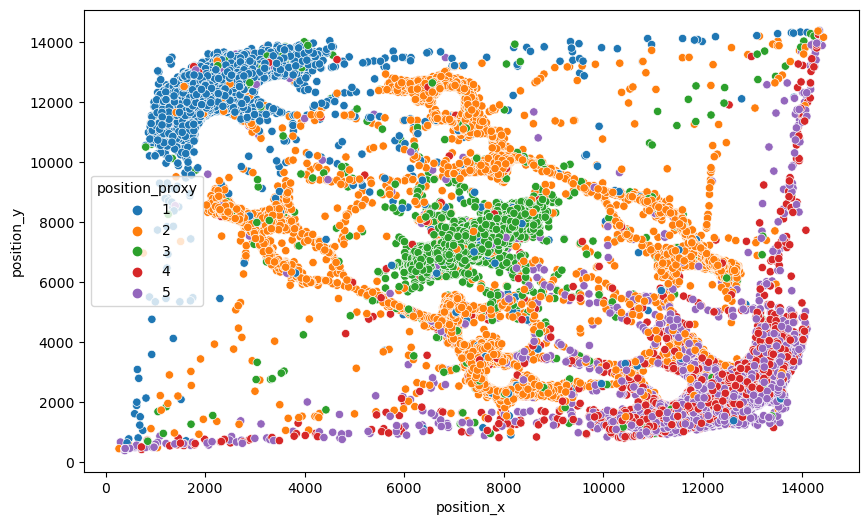

In [74]:
pos_tmp = df_stats[df_stats['sampleTimestamp']==120000][['position_proxy','position_x','position_y']]
pos_tmp['position_proxy'] = pos_tmp['position_proxy'].astype(str)
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=pos_tmp['position_x'], y=pos_tmp['position_y'], hue=pos_tmp['position_proxy'])

### Final Merged Data EDA

In [4]:
df_final_multidim = pd.read_pickle('data_final/df_final_merge.pkl')
df_final_multidim.shape

(2898340, 97)

In [5]:
df_final_multidim.head()

matchId  participantId  sampleTimestamp  currentGold  goldPerSecond  \
0  NA1_4572960672              1                0          500              0   
1  NA1_4572960672              2                0          500              0   
2  NA1_4572960672              3                0          500              0   
3  NA1_4572960672              4                0          500              0   
4  NA1_4572960672              5                0          500              0   

   jungleMinionsKilled  level  minionsKilled  timeEnemySpentControlled  \
0                    0      1              0                         0   
1                    0      1              0                         0   
2                    0      1              0                         0   
3                    0      1              0                         0   
4                    0      1              0                         0   

   totalGold  xp  championStats_abilityHaste  championStats_abilityPower  \
0        500   0                           0                           0   
1        500   0                           0                           0   
2        500   0                           0                           0   
3        500   0                           0                           0   
4        500   0                           0                           0   

   championStats_armor  championStats_armorPen  championStats_armorPenPercent  \
0                   31                       0                              0   
1                   36                       0                              0   
2                   23                       0                              0   
3                   26                       0                              0   
4                   39                       0                              0   

   championStats_attackDamage  championStats_attackSpeed  \
0                          25                        100   
1                          25                        100   
2                          25                        100   
3                          25                        100   
4                          25                        100   

   championStats_bonusArmorPenPercent  championStats_bonusMagicPenPercent  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   championStats_ccReduction  championStats_cooldownReduction  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   championStats_health  championStats_healthMax  championStats_healthRegen  \
0                   600                      600                          0   
1                   640                      640                          0   
2                   600                      600                          0   
3                   600                      600                          0   
4                   635                      635                          0   

   championStats_lifesteal  championStats_magicPen  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   championStats_magicPenPercent  championStats_magicResist  \
0                              0                        

In [3]:
df_final_flat = pd.read_pickle('data_final/df_final_merge_flat.pkl')
df_final_flat.shape

(288877, 732)

In [4]:
df_final_flat['matchId'].nunique()

10308

In [7]:
df_final_flat.head()

matchId  sampleTimestamp  championId_TEAM1_BOTTOM  \
0  NA1_4459931201                0                  18.0000   
1  NA1_4459931201            60000                  18.0000   
2  NA1_4459931201           120000                  18.0000   
3  NA1_4459931201           180000                  18.0000   
4  NA1_4459931201           240000                  18.0000   

   championId_TEAM1_JUNGLE  championId_TEAM1_MIDDLE  championId_TEAM1_TOP  \
0                 421.0000                 112.0000              875.0000   
1                 421.0000                 112.0000              875.0000   
2                 421.0000                 112.0000              875.0000   
3                 421.0000                 112.0000              875.0000   
4                 421.0000                 112.0000              875.0000   

   championId_TEAM1_UTILITY  championId_TEAM2_BOTTOM  championId_TEAM2_JUNGLE  \
0                  143.0000                 119.0000                 141.0000   
1                  143.0000                 119.0000                 141.0000   
2                  143.0000                 119.0000                 141.0000   
3                  143.0000                 119.0000                 141.0000   
4                  143.0000                 119.0000                 141.0000   

   championId_TEAM2_MIDDLE  championId_TEAM2_TOP  championId_TEAM2_UTILITY  \
0                  99.0000              516.0000                  350.0000   
1                  99.0000              516.0000                  350.0000   
2                  99.0000              516.0000                  350.0000   
3                  99.0000              516.0000                  350.0000   
4                  99.0000              516.0000                  350.0000   

   championStats_abilityHaste_TEAM1_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM1_TOP  \
0                                0.0000   
1                                0.0000   
2                                0.0000   
3                                0.0000   
4                                0.0000   

   championStats_abilityHaste_TEAM1_UTILITY  \
0                                    0.0000   
1                                    0.0000   
2                                    0.0000   
3                                    0.0000   
4                                    0.0000   

   championStats_abilityHaste_TEAM2_BOTTOM  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_JUNGLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   championStats_abilityHaste_TEAM2_MIDDLE  \
0                                   0.0000   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   champ

In [10]:
# do some analysis on team features
df_final_multidim_role = df_final_multidim.groupby(['matchId','teamId','win','teamPosition']).agg({
    'minionsKilled':'max',
    'totalGold':'max',
    'xp':'max',
    'damageStats_totalDamageDoneToChampions':'max',
    'damageStats_totalDamageTaken': 'max',
    'RUNNING_KILL_COUNT':'max',
    'RUNNING_DEATH_COUNT': 'max',
})
df_final_multidim_role

minionsKilled  totalGold     xp  \
matchId        teamId   win   teamPosition                                    
NA1_4459931201 100.0000 False BOTTOM                  214      18201  17276   
                              JUNGLE                   24      15924  15692   
                              MIDDLE                  170      11960  15902   
                              TOP                     179      12454  16485   
                              UTILITY                  88      11772  13551   
...                                                   ...        ...    ...   
NA1_4592506957 200.0000 True  BOTTOM                  127       7381   5986   
                              JUNGLE                   15       5423   5521   
                              MIDDLE                  130       5470   7250   
                              TOP                     114       7732   7562   
                              UTILITY                  23       5602   4649   

                                            damageStats_totalDamageDoneToChampions  \
matchId        teamId   win   teamPosition                                           
NA1_4459931201 100.0000 False BOTTOM                                         26398   
                              JUNGLE                                         24292   
                              MIDDLE                                         21009   
                              TOP                                            14957   
                              UTILITY                                        25669   
...                                                                            ...   
NA1_4592506957 200.0000 True  BOTTOM                                         10453   
                              JUNGLE                                          4643   
                              MIDDLE                                          6775   
                              TOP                                             7501   
                              UTILITY                                         4510   

                                            damageStats_totalDamageTaken  \
matchId        teamId   win   teamPosition                                 
NA1_4459931201 100.0000 False BOTTOM                               26660   
                              JUNGLE                               36946   
                              MIDDLE                               19024   
                              TOP                                  33727   
                              UTILITY                              13592   
...                                                                  ...   
NA1_4592506957 200.0000 True  BOTTOM                                6813   
                              JUNGLE                               13219   
                              MIDDLE                                7275   
                              TOP                                   8359   
                              UTILITY                               5980   

                                            RUNNING_KILL_COUNT  \
matchId        teamId   win   teamPosition                       
NA1_4459931201 100.0000 False BOTTOM                    8.0000   
                              JUNGLE                   14.0000   
                              MIDDLE                    0.0000   
                              TOP                       4.0000   
                              UTILITY                   2.0000   
...                                                        ...   
NA1_4592506957 200.0000 True  BOTTOM                    5.0000   
                              JUNGLE                    2.0000   
                              MIDDLE                    1.0000   
                              TOP                       3.0000   
                              UTILITY                   4.0000   

                                            RUNNI

C:\Users\kdai1\AppData\Local\Temp\ipykernel_9840\600034275.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


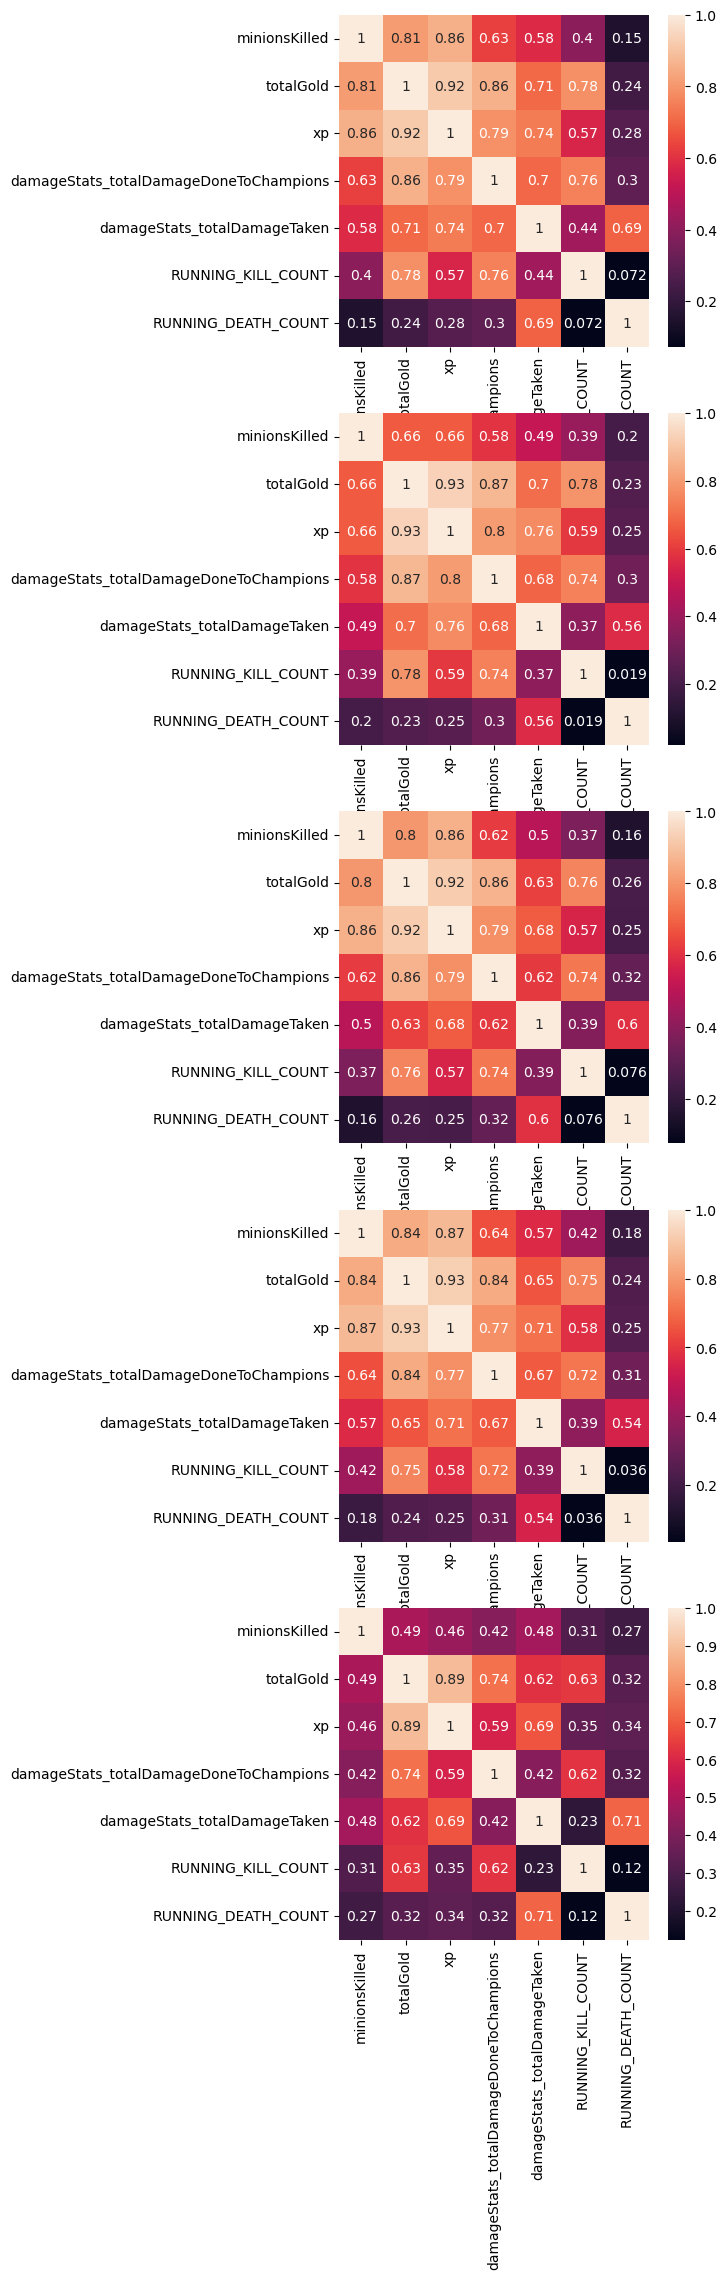

In [23]:
fig, ax = plt.subplots(5,1, figsize=(5,25))
for i,teamPosition in enumerate(['BOTTOM','JUNGLE','MIDDLE','TOP','UTILITY']):
    tmp = df_final_multidim_role[df_final_multidim_role.index.isin([teamPosition],level=3)]
    cm = tmp.corr()
    sns.heatmap(cm, annot=True, ax=ax[i])
    ax[i].set_title=teamPosition
fig.show()

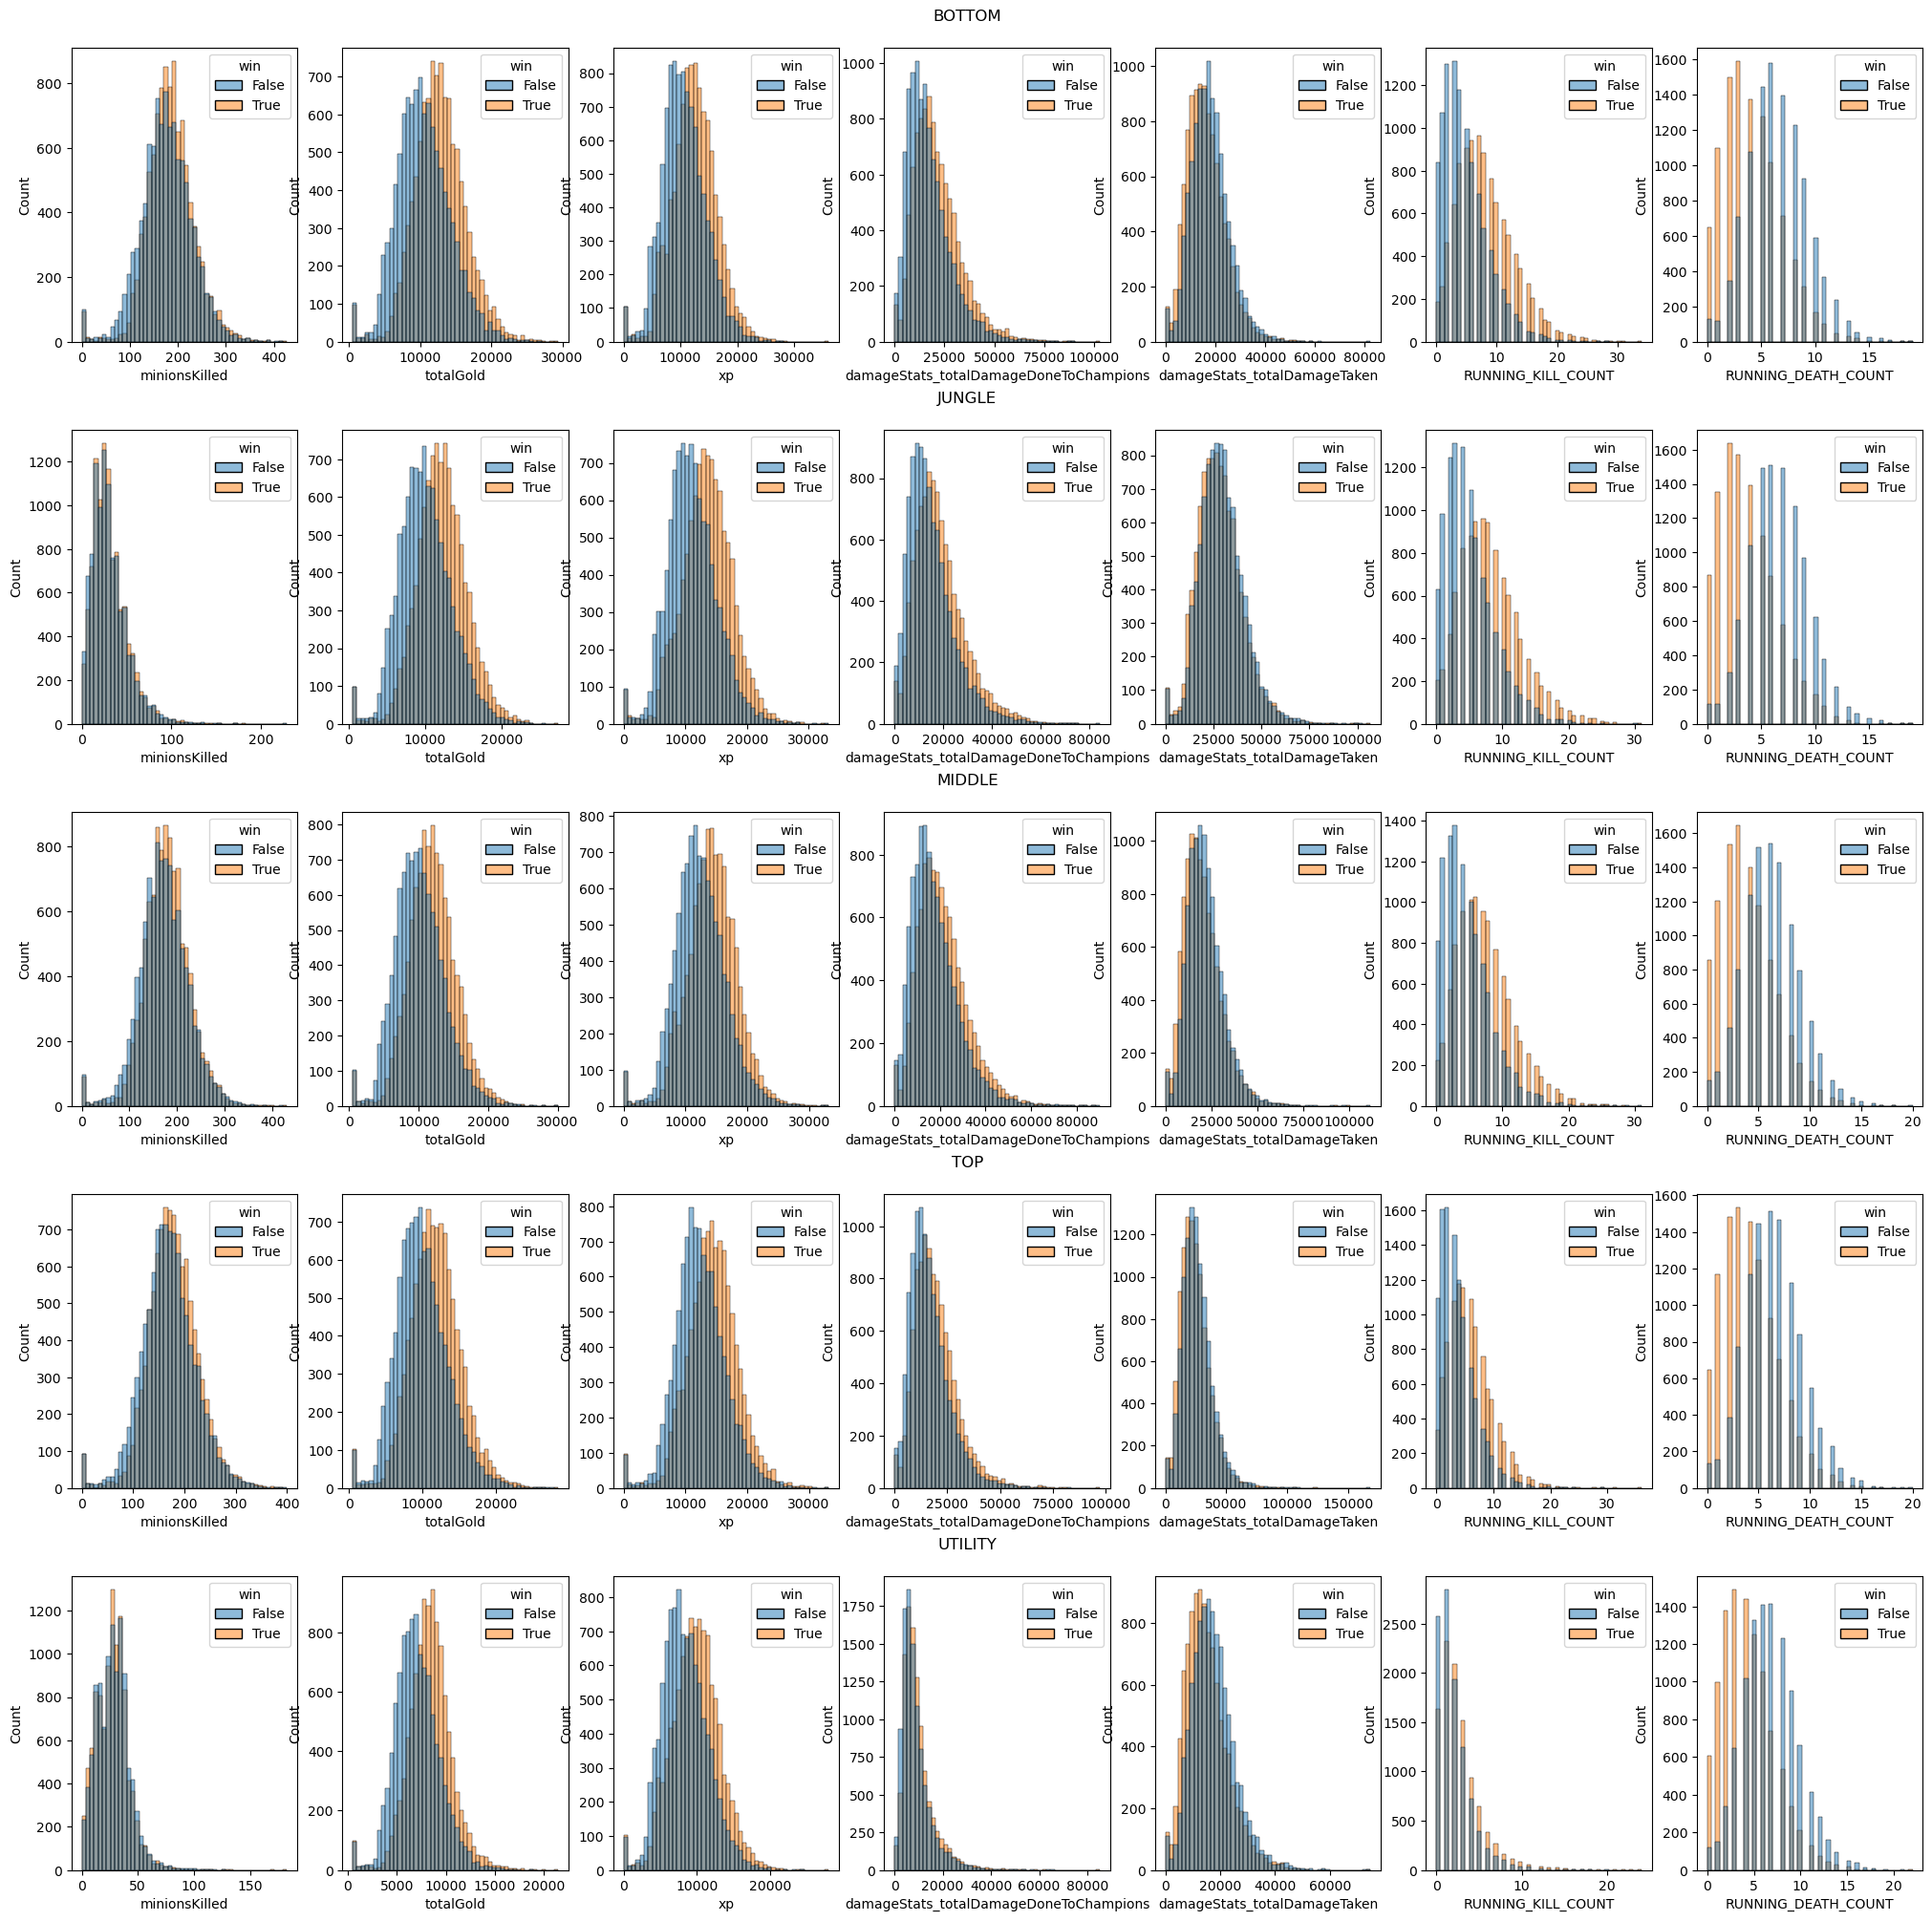

In [31]:
cols = [
    'minionsKilled',
    'totalGold',
    'xp',
    'damageStats_totalDamageDoneToChampions',
    'damageStats_totalDamageTaken',
    'RUNNING_KILL_COUNT',
    'RUNNING_DEATH_COUNT'
]
rows= ['BOTTOM','JUNGLE','MIDDLE','TOP','UTILITY']
tmp = df_final_multidim_role.reset_index()
# fig, ax = plt.subplots(5,len(cols), figsize=(20,20))
fig = plt.figure(figsize=(25,20))
subfigs = fig.subfigures(nrows=5, ncols=1)
for i,subfig in enumerate(subfigs):
    subfig.suptitle(rows[i])
    axes = subfig.subplots(nrows=1,ncols=len(cols))
    tmp_role = tmp[tmp['teamPosition']==rows[i]]
    for j,ax in enumerate(axes):
        sns.histplot(x=tmp_role[cols[j]], hue=tmp_role['win'], ax=ax, bins=50)

## Miscellaneous stuff

In [4]:
tmp = pd.read_pickle('data_append/participant_puuid_map.pkl')
tmp.shape

(314300, 3)

In [5]:
tmp['matchId'].nunique()

31430

In [6]:
with open('match_id_list.pkl','rb') as f:
        match_id_list = pickle.load(f)

In [10]:
len(match_id_list)

50000

In [8]:
match_id_list = match_id_list[:50000]

In [12]:
l = list(tmp['matchId'].unique())

In [13]:
match_id_list_new = list(set(match_id_list) - set(l))
len(match_id_list_new)

18570

In [ ]:
with open('match_id_list_2.pkl','wb') as f:
    pickle.dump(match_id_list_new, f)

In [23]:
dir_1 = 'data_append/'
dir_2 = 'data_append_2/'
dir_3 = 'data_new/'

for filename in os.listdir("data_append/"):
    print(os.path.join(dir_1, filename))
    print(os.path.join(dir_2, filename))


data_append/
data_append/building_kill.pkl
data_append_2/building_kill.pkl
data_append/champion_kill.pkl
data_append_2/champion_kill.pkl
data_append/champion_special_kill.pkl
data_append_2/champion_special_kill.pkl
data_append/champion_transform.pkl
data_append_2/champion_transform.pkl
data_append/dragon_soul_given.pkl
data_append_2/dragon_soul_given.pkl
data_append/elite_monster_kill.pkl
data_append_2/elite_monster_kill.pkl
data_append/game_end.pkl
data_append_2/game_end.pkl
data_append/item_destroyed.pkl
data_append_2/item_destroyed.pkl
data_append/item_purchased.pkl
data_append_2/item_purchased.pkl
data_append/item_sold.pkl
data_append_2/item_sold.pkl
data_append/item_undo.pkl
data_append_2/item_undo.pkl
data_append/level_up.pkl
data_append_2/level_up.pkl
data_append/objective_bounty_finish.pkl
data_append_2/objective_bounty_finish.pkl
data_append/objective_bounty_prestart.pkl
data_append_2/objective_bounty_prestart.pkl
data_append/participant_puuid_map.pkl
data_append_2/participant